# Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima.stationarity import ADFTest
from pmdarima.arima.utils import ndiffs
import pmdarima as pm
import gc
from sklearn.linear_model import LinearRegression
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

from utils import *

# Data

In [2]:
df = pd.read_csv('data/taxi_pickups_area.csv', index_col='Trip Start Timestamp', parse_dates=True)
df.head()

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-04-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2019-04-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2019-04-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-04-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8064 entries, 2019-04-01 00:00:00 to 2019-06-23 23:45:00
Columns: 78 entries, Pickup Community Area_0 to Pickup Community Area_77
dtypes: float64(78)
memory usage: 4.9 MB


In [3]:
df_train = df[:'2019-06-16'].copy()
df_train.tail()

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-16 22:45:00,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
2019-06-16 23:00:00,4.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0
2019-06-16 23:15:00,4.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1.0
2019-06-16 23:30:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
2019-06-16 23:45:00,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0


In [5]:
df_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7392 entries, 2019-04-01 00:00:00 to 2019-06-16 23:45:00
Columns: 78 entries, Pickup Community Area_0 to Pickup Community Area_77
dtypes: float64(78)
memory usage: 4.5 MB


In [4]:
df_val = df['2019-06-17':'2019-06-23'].copy()
df_val.tail()

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-23 22:45:00,4.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0
2019-06-23 23:00:00,3.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0
2019-06-23 23:15:00,3.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0
2019-06-23 23:30:00,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0
2019-06-23 23:45:00,5.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0


In [7]:
df_val.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2019-06-17 00:00:00 to 2019-06-23 23:45:00
Columns: 78 entries, Pickup Community Area_0 to Pickup Community Area_77
dtypes: float64(78)
memory usage: 414.8 KB


# Task
In this project, you will work on demand forecasting. This task might be useful for many different industries: manufacturers, retailers, banks, etc. This time you will help a taxi company optimize their business. If you can predict that in certain areas tomorrow X taxis will be needed at that time, you can reduce arrival time and be better than the competitors. In order to do this you will need to try different architectures:

В этом проекте вы будете работать над прогнозированием спроса. Эта задача может быть полезна для самых разных отраслей: производителей, ритейлеров, банков и т. д. На этот раз вы поможете таксопарку оптимизировать их бизнес. Если вы можете предсказать, что завтра в определенных районах в это время потребуется X такси, вы можете сократить время прибытия и быть лучше конкурентов. Для этого вам нужно будет попробовать разные архитектуры:

## Naive averages
1. For each area make a prediction with the global average for this area for the next 673 intervals.
2. Calculate mean absolute error (MAE) for your own validation dataset.
---
1. Для каждой области сделайте прогноз с глобальным средним значением для этой области на следующие 673 интервала.
2. Рассчитайте среднюю абсолютную ошибку (MAE) для собственного набора проверочных данных.

Посчитаем глобальные средние значения по каждой области (т.е. столбцу) датафрейма df. Это будут предсказания на следующую неделю

In [8]:
df_naive_average_predict = pd.read_csv('data/taxi_submission_file.csv', index_col='Trip Start Timestamp', parse_dates=True)
df_naive_average_predict.fillna(0.0, inplace=True)
df_naive_average_predict.tail()

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-30 22:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-30 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-30 23:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-30 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-30 23:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
for area in df:
	df_naive_average_predict[area] = df[area].mean()

df_naive_average_predict.head()

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-24 00:00:00,15.74814,1.09065,1.083457,2.617188,0.858631,0.559524,9.733507,5.498264,83.93316,0.015501,...,0.075521,0.114955,0.063988,0.116567,0.024802,0.097594,0.010789,0.064484,30.329117,2.078249
2019-06-24 00:15:00,15.74814,1.09065,1.083457,2.617188,0.858631,0.559524,9.733507,5.498264,83.93316,0.015501,...,0.075521,0.114955,0.063988,0.116567,0.024802,0.097594,0.010789,0.064484,30.329117,2.078249
2019-06-24 00:30:00,15.74814,1.09065,1.083457,2.617188,0.858631,0.559524,9.733507,5.498264,83.93316,0.015501,...,0.075521,0.114955,0.063988,0.116567,0.024802,0.097594,0.010789,0.064484,30.329117,2.078249
2019-06-24 00:45:00,15.74814,1.09065,1.083457,2.617188,0.858631,0.559524,9.733507,5.498264,83.93316,0.015501,...,0.075521,0.114955,0.063988,0.116567,0.024802,0.097594,0.010789,0.064484,30.329117,2.078249
2019-06-24 01:00:00,15.74814,1.09065,1.083457,2.617188,0.858631,0.559524,9.733507,5.498264,83.93316,0.015501,...,0.075521,0.114955,0.063988,0.116567,0.024802,0.097594,0.010789,0.064484,30.329117,2.078249


Посчитаем MAE для валидационного датафрейма df_val. Сначала, аналогично тому, как делали выше, определим значения для df_val_predict, вычисляя глобальное среднее для каждой области (столбцу) датафрейма df_train

In [10]:
df_val_predict = df_val.copy() * 0.0
df_val_predict.tail()

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-23 22:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-23 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-23 23:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-23 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-23 23:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
for area in df:
	df_val_predict[area] = df_train[area].mean()

df_val_predict.head()

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-17 00:00:00,16.599702,1.165449,1.159497,2.80506,0.920049,0.598891,10.332927,5.867695,89.722403,0.016369,...,0.080628,0.122159,0.068588,0.124729,0.02638,0.104708,0.011634,0.068994,32.456169,2.224297
2019-06-17 00:15:00,16.599702,1.165449,1.159497,2.80506,0.920049,0.598891,10.332927,5.867695,89.722403,0.016369,...,0.080628,0.122159,0.068588,0.124729,0.02638,0.104708,0.011634,0.068994,32.456169,2.224297
2019-06-17 00:30:00,16.599702,1.165449,1.159497,2.80506,0.920049,0.598891,10.332927,5.867695,89.722403,0.016369,...,0.080628,0.122159,0.068588,0.124729,0.02638,0.104708,0.011634,0.068994,32.456169,2.224297
2019-06-17 00:45:00,16.599702,1.165449,1.159497,2.80506,0.920049,0.598891,10.332927,5.867695,89.722403,0.016369,...,0.080628,0.122159,0.068588,0.124729,0.02638,0.104708,0.011634,0.068994,32.456169,2.224297
2019-06-17 01:00:00,16.599702,1.165449,1.159497,2.80506,0.920049,0.598891,10.332927,5.867695,89.722403,0.016369,...,0.080628,0.122159,0.068588,0.124729,0.02638,0.104708,0.011634,0.068994,32.456169,2.224297


In [12]:
df_total = df.copy()
df_total = df_total.append(df_naive_average_predict)
df_total.tail(700)

/var/folders/tc/f8lnkrvs6x99hfwzg3yx8d6c0000gp/T/ipykernel_43574/1148898842.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_naive_average_predict)


,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-23 17:00:00,7.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,20.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
2019-06-23 17:15:00,1.00000,2.00000,1.000000,1.000000,1.000000,0.000000,9.000000,2.000000,14.00000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
2019-06-23 17:30:00,6.00000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,13.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
2019-06-23 17:45:00,6.00000,0.00000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,19.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000
2019-06-23 18:00:00,10.00000,1.00000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,23.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-30 22:45:00,15.74814,1.09065,1.083457,2.617188,0.858631,0.559524,9.733507,5.498264,83.93316,0.015501,...,0.075521,0.114955,0.063988,0.116567,0.024802,0.097594,0.010789,0.064484,30.329117,2.078249
2019-06-30 23:00:00,15.74814,1.09065,1.083457,2.617188,0.858631,0.559524,9.733507,5.498264,83.93316,0.015501,...,0.075521,0.114955,0.063988,0.116567,0.024802,0.097594,0.010789,0.064484,30.329117,2.078249
2019-06-30 23:15:00,15.74814,1.09065,1.083457,2.617188,0.858631,0.559524,9.733507,5.498264,83.93316,0.015501,...,0.075521,0.114955,0.063988,0.116567,0.024802,0.097594,0.010789,0.064484,30.329117,2.078249


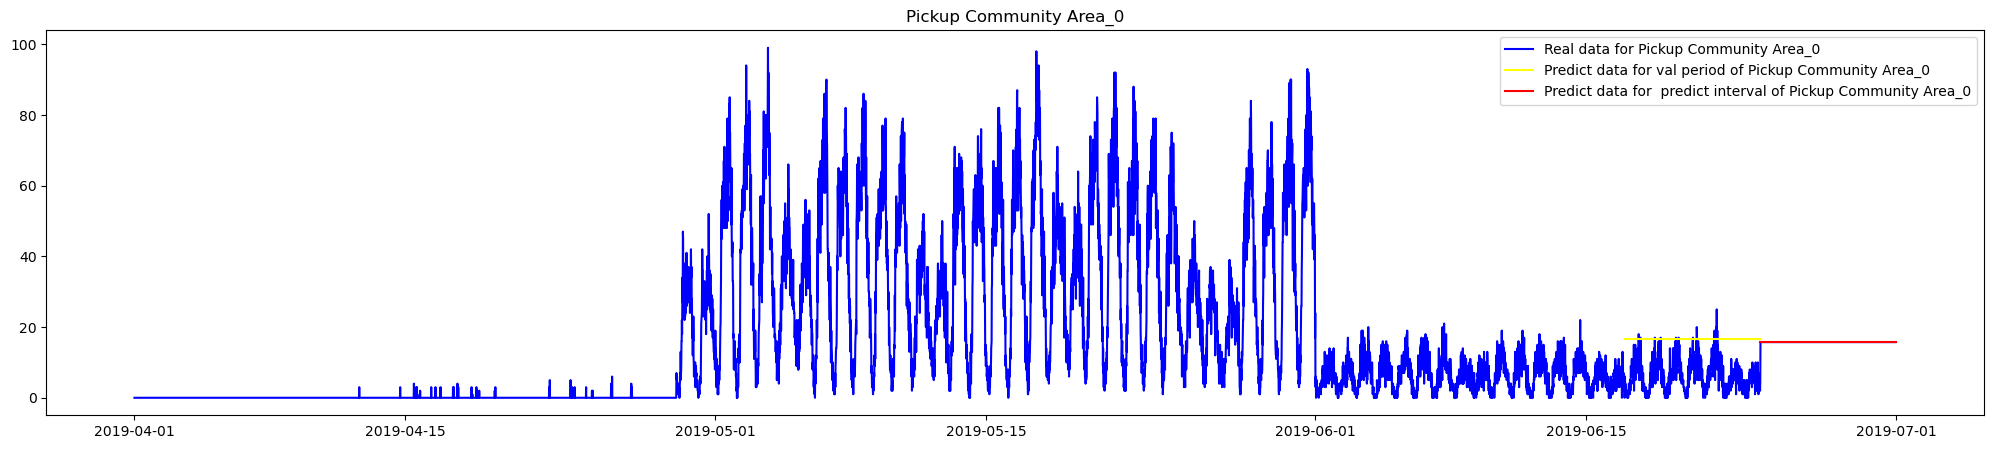

In [13]:
for area in df_total[df_total.columns[:1]]:
	plt.figure(figsize=(25,5))
	plt.plot(df_total[area], label=f'Real data for {area}', color='blue')
	plt.plot(df_val_predict[area], label=f'Predict data for val period of {area}', color='yellow')
	plt.plot(df_naive_average_predict[area], label=f'Predict data for  predict interval of {area}', color='red')
	plt.legend(loc='best')
	plt.title(area)
	plt.show()

In [14]:
df_naive_average_predict.tail()

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-30 22:45:00,15.74814,1.09065,1.083457,2.617188,0.858631,0.559524,9.733507,5.498264,83.93316,0.015501,...,0.075521,0.114955,0.063988,0.116567,0.024802,0.097594,0.010789,0.064484,30.329117,2.078249
2019-06-30 23:00:00,15.74814,1.09065,1.083457,2.617188,0.858631,0.559524,9.733507,5.498264,83.93316,0.015501,...,0.075521,0.114955,0.063988,0.116567,0.024802,0.097594,0.010789,0.064484,30.329117,2.078249
2019-06-30 23:15:00,15.74814,1.09065,1.083457,2.617188,0.858631,0.559524,9.733507,5.498264,83.93316,0.015501,...,0.075521,0.114955,0.063988,0.116567,0.024802,0.097594,0.010789,0.064484,30.329117,2.078249
2019-06-30 23:30:00,15.74814,1.09065,1.083457,2.617188,0.858631,0.559524,9.733507,5.498264,83.93316,0.015501,...,0.075521,0.114955,0.063988,0.116567,0.024802,0.097594,0.010789,0.064484,30.329117,2.078249
2019-06-30 23:45:00,15.74814,1.09065,1.083457,2.617188,0.858631,0.559524,9.733507,5.498264,83.93316,0.015501,...,0.075521,0.114955,0.063988,0.116567,0.024802,0.097594,0.010789,0.064484,30.329117,2.078249


In [15]:
res_mae = mae_for_df(df_val, df_val_predict)
res_mae

3.1034759511322014

In [16]:
res_mae_ = mean_absolute_error(df_val, df_val_predict)
res_mae_

3.1034759511322014

## Moving averages

1. For each area make a prediction with different moving averages for this area for the next 673 intervals.
2. Calculate mean absolute error (MAE) for the validation dataset.
---
1. Для каждой области сделать прогноз с разными скользящими средними для этой области на следующие 673 интервала.
2. Рассчитайте среднюю абсолютную ошибку (MAE) для проверочного набора данных.

https://habr.com/ru/companies/otus/articles/728118/

Посчитаем скользящие средние значения для разных окон, от получаса до месяца ([2, 4, 96, 672, 2880]) по каждой области (т.е. столбцу) датафрейма df. Это будут предсказания на следующую неделю

In [17]:
df_moving_average_2_predict = pd.read_csv('data/taxi_submission_file.csv', index_col='Trip Start Timestamp',
										  parse_dates=True)
df_moving_average_4_predict = pd.read_csv('data/taxi_submission_file.csv', index_col='Trip Start Timestamp',
										  parse_dates=True)
df_moving_average_96_predict = pd.read_csv('data/taxi_submission_file.csv', index_col='Trip Start Timestamp',
										   parse_dates=True)
df_moving_average_672_predict = pd.read_csv('data/taxi_submission_file.csv', index_col='Trip Start Timestamp',
											 parse_dates=True)
df_moving_average_2880_predict = pd.read_csv('data/taxi_submission_file.csv', index_col='Trip Start Timestamp',
											 parse_dates=True)

df_dict = {2: df_moving_average_2_predict,
		   4: df_moving_average_4_predict,
		   96: df_moving_average_96_predict,
		   672: df_moving_average_672_predict,
		   2880: df_moving_average_2880_predict}

In [18]:
for window in [2, 4, 96, 672, 2880]:
	df_dict[window].fillna(0.0, inplace=True)

In [19]:
df_moving_average_4_predict.head()

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-24 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-24 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-24 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-24 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-24 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# for area in df:
#     for window in [2, 4, 96, 672, 2880]:
#         df_dict[window][area] = df[area].rolling(window).mean()

for window in [2, 4, 96, 672, 2880]:
	df_dict[window] = df_total.rolling(window, min_periods=1).mean()

In [21]:
df_moving_average_4_predict.head(700)

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-24 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-24 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-24 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-24 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-24 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-30 22:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-30 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-30 23:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Predict for moving average with window = 2:


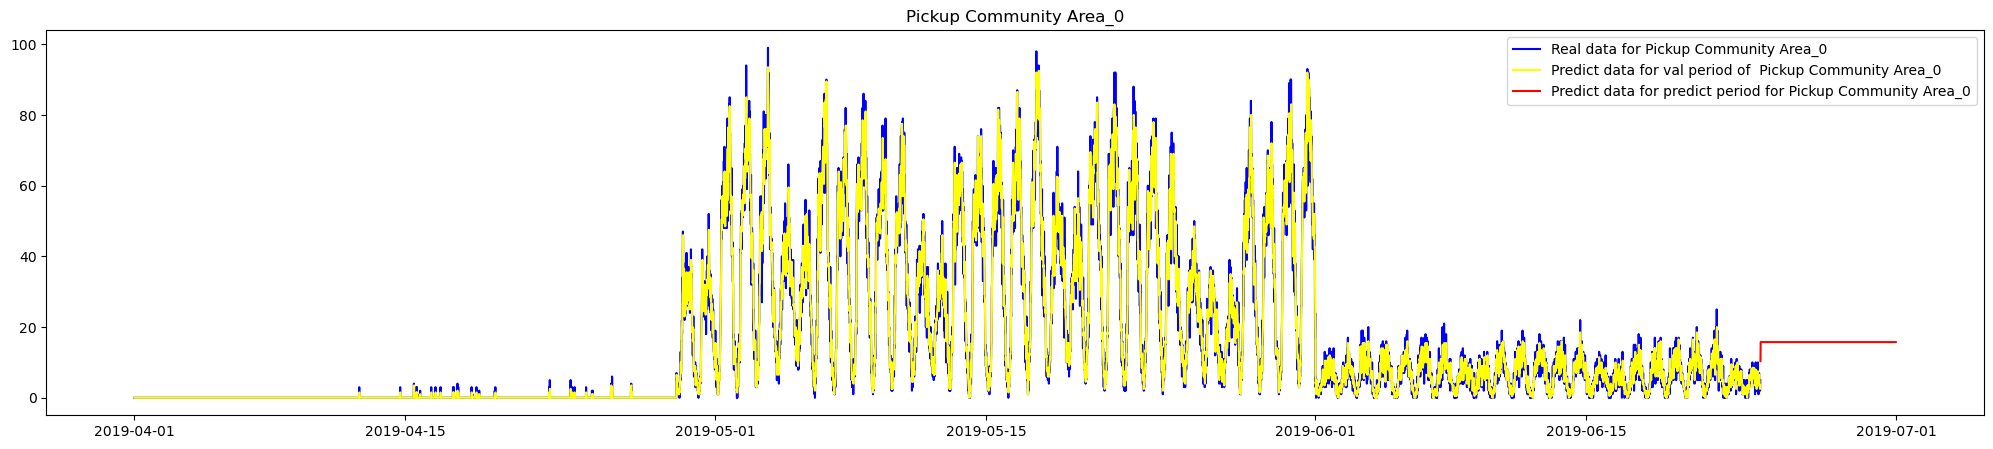

Predict for moving average with window = 4:


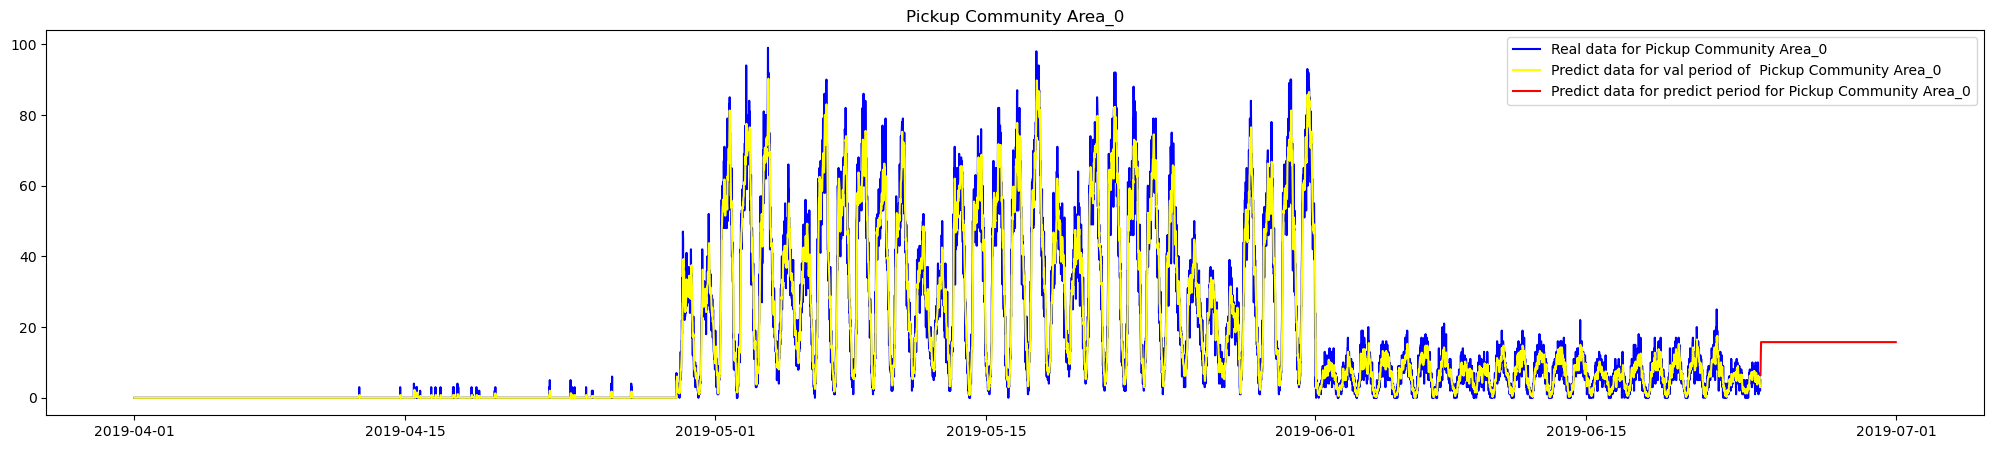

Predict for moving average with window = 96:


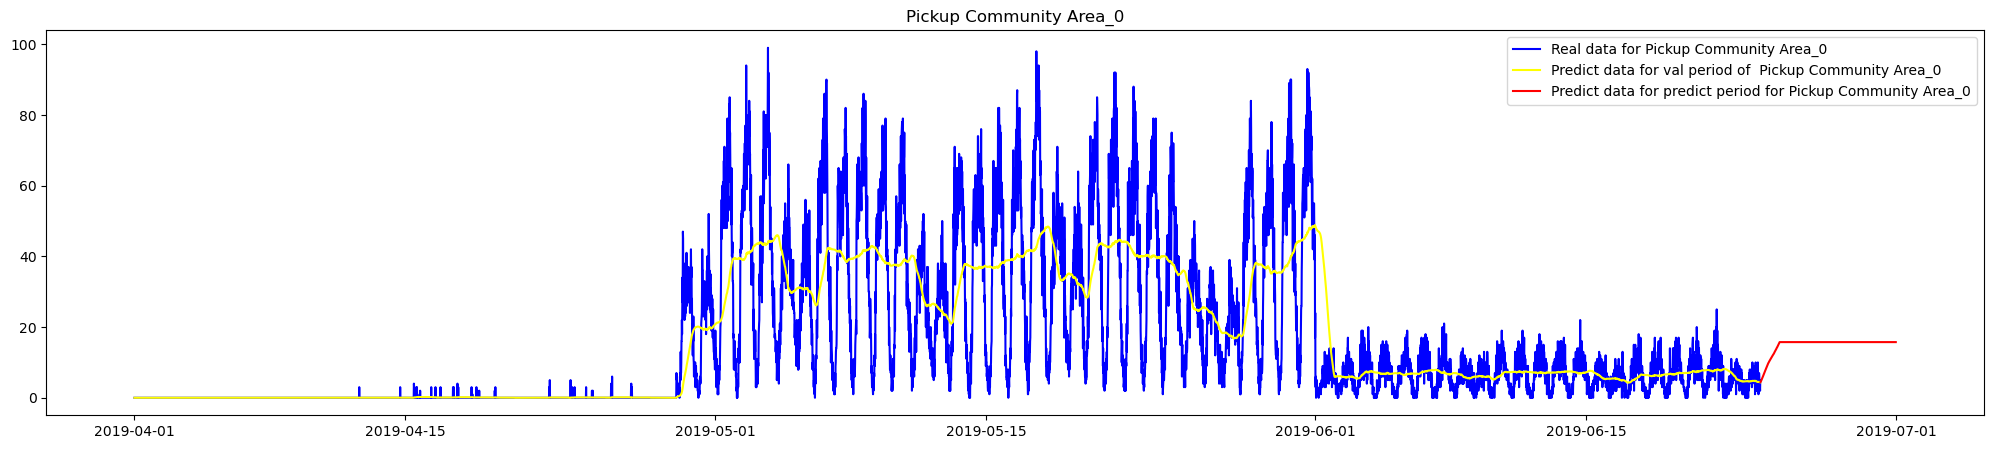

Predict for moving average with window = 672:


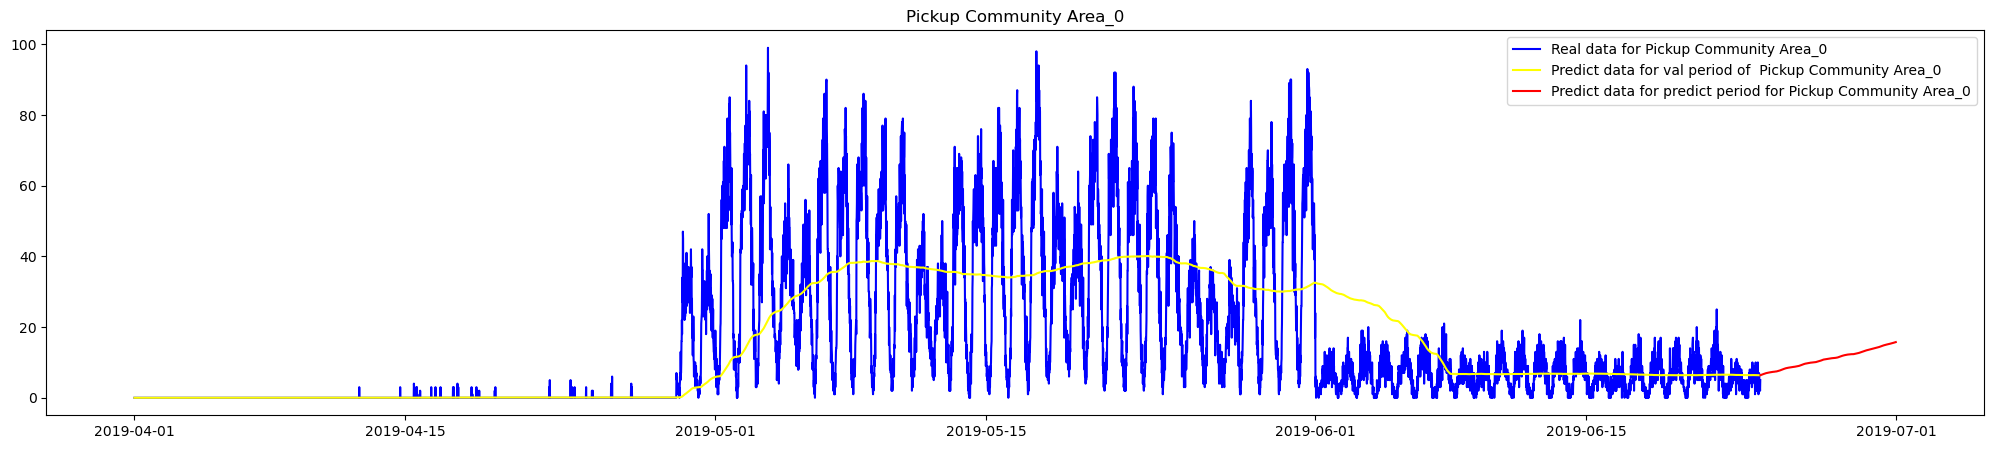

Predict for moving average with window = 2880:


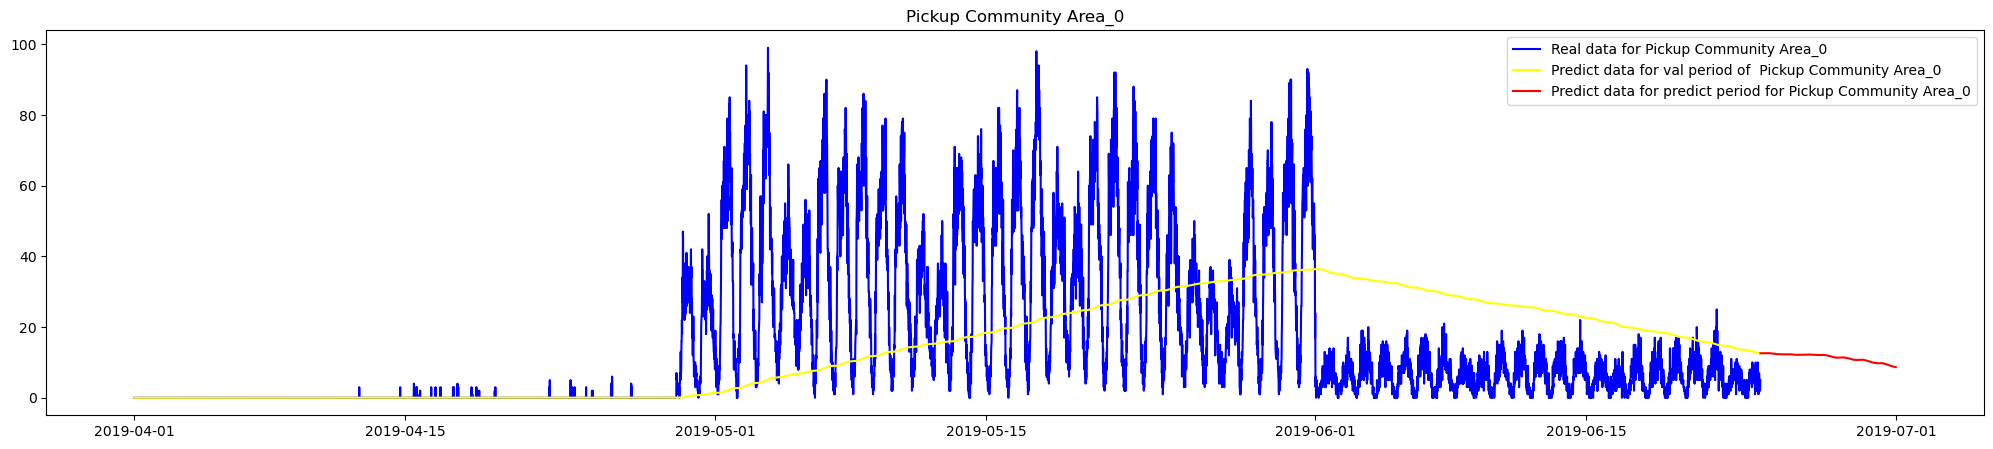

In [22]:
for area in df[df.columns[:1]]:
	for window in [2, 4, 96, 672, 2880]:
		print(f'Predict for moving average with window = {window}:')
		df_val_predict = df.rolling(window, min_periods=1).mean()

		plt.figure(figsize=(25,5))
		plt.plot(df[area], label=f'Real data for {area}', color='blue')
		plt.plot(df_val_predict[area], label=f'Predict data for val period of  {area}', color='yellow')
		plt.plot(df_dict[window][area][-672:], label=f'Predict data for predict period for {area}', color='red')
		plt.legend(loc='best')
		plt.title(area)
		plt.show()

In [23]:
for window in [2, 4, 96, 672, 2880]:
		print(f'MeanAbsoluteError for moving average with window = {window}:')
		df_val_predict = df.rolling(window, min_periods=1).mean()
		print(round(mean_absolute_error(df_val, df_val_predict[-672:]), 2))
		# plt.figure(figsize=(25,5))
		# plt.plot(df[area], label=f'Real data for {area}', color='blue')
		# plt.plot(df_val_predict[area][-672:], label=f'Predict data for val period of  {area}', color='yellow')
		# plt.plot(df_dict[window][area][-672:], label=f'Predict data for predict period for {area}', color='red')

MeanAbsoluteError for moving average with window = 2:
0.2
MeanAbsoluteError for moving average with window = 4:
0.27
MeanAbsoluteError for moving average with window = 96:
0.63
MeanAbsoluteError for moving average with window = 672:
0.65
MeanAbsoluteError for moving average with window = 2880:
1.95


## Exponential smoothing

1. For each area make a prediction with 3 different exponential smoothing algorithms for this area for the next 673 intervals. Optimize the weights.
2. Calculate mean absolute error (MAE) for the validation dataset.


1. Для каждой области сделать прогноз с помощью 3 различных алгоритмов экспоненциального сглаживания для этой области на следующие 673 интервала. Оптимизируйте веса.
2. Рассчитайте среднюю абсолютную ошибку (MAE) для проверочного набора данных.

Разложим временной ряд и посмотрим, есть ли в данных уровни, тренды и сезонность. Период - 15 минут (4*24).

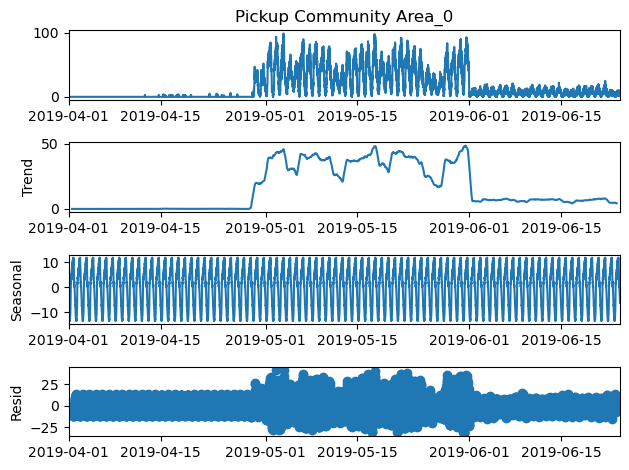

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

for area in df_total[df_total.columns[:1]]:
	decompose_result = seasonal_decompose(df[area], period = 4*24, model='additive')
	decompose_result.plot()

In [25]:
df_val = df['2019-06-17':'2019-06-23'].copy()
df_val_predict = df_val.copy() * 0.0
# df_val = df.copy()
# df_val_predict = df_val.copy() * 0.0
for area in df_train:
	model = SimpleExpSmoothing(np.asarray(df_train[area])).fit(smoothing_level=0.2, optimized=False, use_brute=True)
	# df_val_predict[area] = model.fittedvalues[:672]
	df_val_predict[area] = model.forecast(672)

In [26]:
df_braun_predict = pd.read_csv('data/taxi_submission_file.csv', index_col='Trip Start Timestamp', parse_dates=True)
df_braun_predict.fillna(0.0, inplace=True)

for area in df_train:
	model = SimpleExpSmoothing(np.asarray(df[area])).fit(smoothing_level=0.2, optimized=False, use_brute=True)
	df_braun_predict[area] = model.forecast(672)
	# df_braun_predict[area] = model.fittedvalues[:672]

In [27]:
df_total = df.copy()
df_total = df_total.append(df_braun_predict)

/var/folders/tc/f8lnkrvs6x99hfwzg3yx8d6c0000gp/T/ipykernel_43574/4151968948.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_braun_predict)


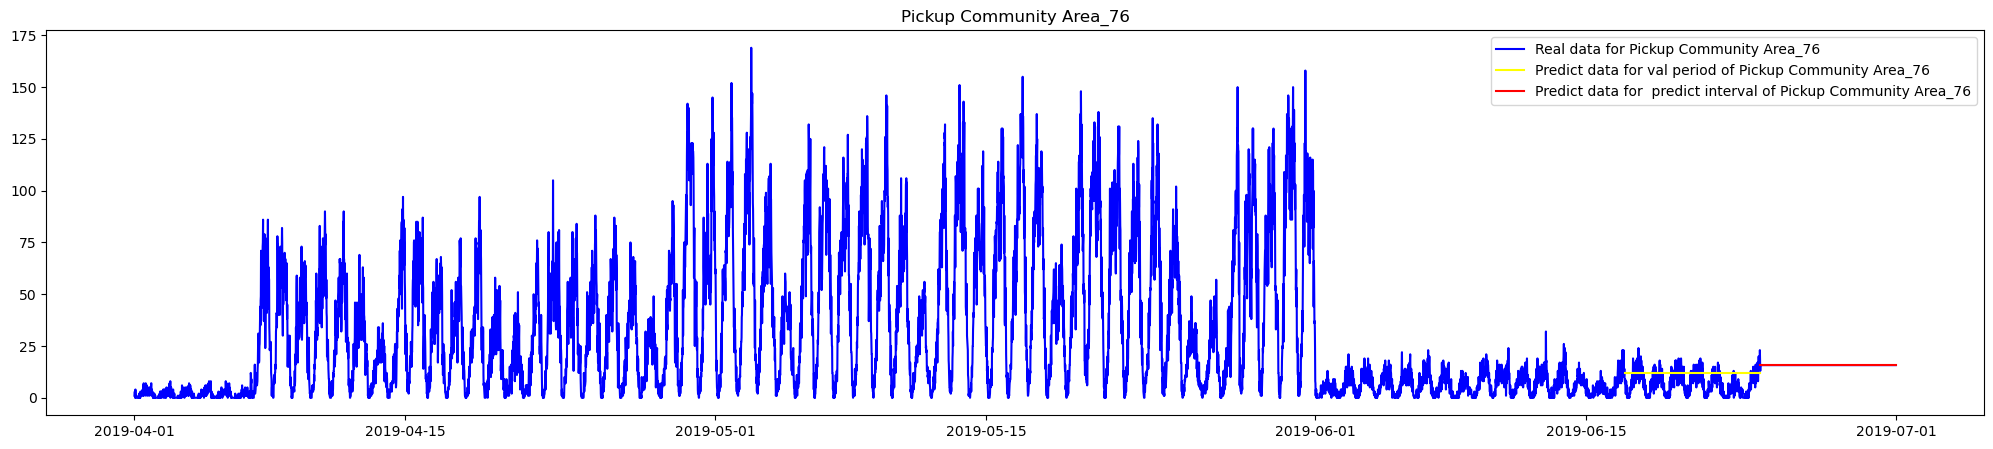

In [28]:
for area in df_total[df_total.columns[76:77]]:
	plt.figure(figsize=(25,5))
	plt.plot(df_total[area], label=f'Real data for {area}', color='blue')
	plt.plot(df_val_predict[area], label=f'Predict data for val period of {area}', color='yellow')
	plt.plot(df_braun_predict[area], label=f'Predict data for  predict interval of {area}', color='red')
	plt.legend(loc='best')
	plt.title(area)
	plt.show()

In [29]:
# df_val = df.copy()
res_mae = mean_absolute_error(df_val, df_val_predict)
res_mae

0.7544415490714245

In [30]:
df_val_predict = df_val.copy() * 0.0
for area in df_train:
	model = Holt(np.asarray(df_train[area])).fit(smoothing_level=0.2, smoothing_trend=0.00045, optimized=False, use_brute=True)
	df_val_predict[area] = model.forecast(672)
	# df_val_predict[area] = model.fittedvalues[:672]

In [31]:
df_holt_predict = pd.read_csv('data/taxi_submission_file.csv', index_col='Trip Start Timestamp', parse_dates=True)
df_holt_predict.fillna(0.0, inplace=True)

for area in df_train:
	model = Holt(np.asarray(df[area])).fit(smoothing_level=0.2, smoothing_trend=0.00045, optimized=False, use_brute=True)
	df_holt_predict[area] = model.forecast(672)
	# df_holt_predict[area] = model.fittedvalues[:672]

In [32]:
df_total = df.copy()
df_total = df_total.append(df_holt_predict)

/var/folders/tc/f8lnkrvs6x99hfwzg3yx8d6c0000gp/T/ipykernel_43574/2067574991.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_holt_predict)


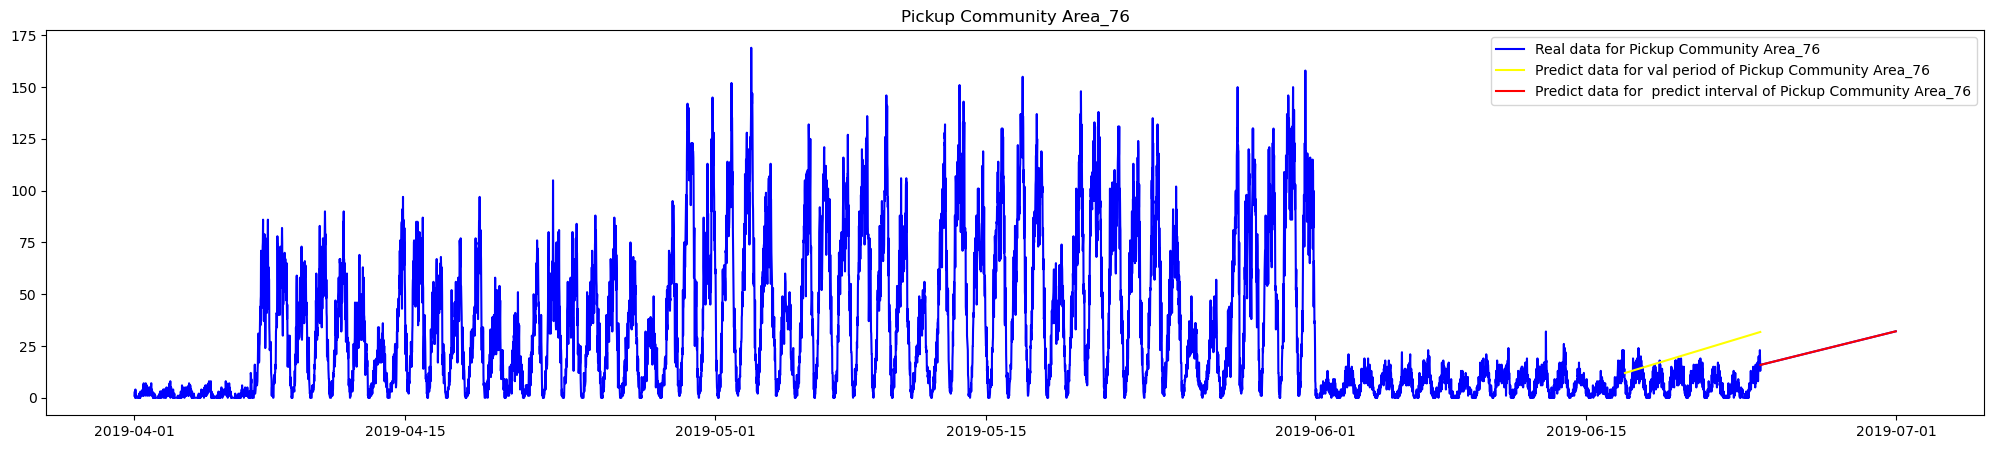

In [33]:
for area in df_total[df_total.columns[76:77]]:
	plt.figure(figsize=(25,5))
	plt.plot(df_total[area], label=f'Real data for {area}', color='blue')
	plt.plot(df_val_predict[area], label=f'Predict data for val period of {area}', color='yellow')
	plt.plot(df_holt_predict[area], label=f'Predict data for  predict interval of {area}', color='red')
	plt.legend(loc='best')
	plt.title(area)
	plt.show()

In [34]:
res_mae = mean_absolute_error(df_val, df_val_predict)
res_mae

0.9164567842547973

In [35]:
df_holt_predict.head()

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-24 00:00:00,4.065681,0.414302,0.250088,0.362041,-0.000608,0.078666,2.863544,0.756452,7.986974,-0.000025,...,0.000332,0.069944,-0.000108,0.000483,-0.000039,-0.000051,-0.000015,-0.000097,15.883335,0.102248
2019-06-24 00:15:00,4.061121,0.414146,0.249869,0.361399,-0.000871,0.078525,2.861698,0.755033,7.990633,-0.000030,...,0.000308,0.069939,-0.000129,0.000447,-0.000047,-0.000082,-0.000018,-0.000117,15.907492,0.101657
2019-06-24 00:30:00,4.056562,0.413989,0.249650,0.360757,-0.001135,0.078385,2.859851,0.753613,7.994293,-0.000035,...,0.000284,0.069933,-0.000151,0.000411,-0.000054,-0.000113,-0.000021,-0.000136,15.931649,0.101066
2019-06-24 00:45:00,4.052002,0.413833,0.249432,0.360115,-0.001398,0.078244,2.858005,0.752193,7.997952,-0.000040,...,0.000260,0.069928,-0.000172,0.000375,-0.000062,-0.000144,-0.000024,-0.000156,15.955806,0.100475
2019-06-24 01:00:00,4.047442,0.413676,0.249213,0.359473,-0.001662,0.078103,2.856158,0.750774,8.001611,-0.000045,...,0.000235,0.069922,-0.000194,0.000338,-0.000070,-0.000175,-0.000027,-0.000175,15.979963,0.099884


In [38]:
from scipy.special import lmbda

df_val_predict = df_val.copy() * 0.0
for area in df_train:
	model = ExponentialSmoothing(np.asarray(df_train[area]),
											seasonal_periods=4*12,
											trend="add",
											seasonal="add",
											damped_trend=True,
											use_boxcox=1.01,
											initialization_method="estimated")
		# .fit(use_brute=True, smoothing_level=0.2, smoothing_trend=0.00045, smoothing_seasonal=0.35)
	res = model.fit(use_brute=True, smoothing_level=0.2, smoothing_trend=0.00045, smoothing_seasonal=0.35)
	df_val_predict[area] = res.forecast(672)

In [39]:
df_val_predict['Pickup Community Area_76']

Trip Start Timestamp
2019-06-17 00:00:00     8.812324
2019-06-17 00:15:00     9.745632
2019-06-17 00:30:00    11.949386
2019-06-17 00:45:00    10.154624
2019-06-17 01:00:00     9.285426
                         ...    
2019-06-23 22:45:00     9.520282
2019-06-23 23:00:00    11.102837
2019-06-23 23:15:00    12.766293
2019-06-23 23:30:00    11.387675
2019-06-23 23:45:00    10.181954
Name: Pickup Community Area_76, Length: 672, dtype: float64

In [40]:
df_val['Pickup Community Area_76']

Trip Start Timestamp
2019-06-17 00:00:00     7.0
2019-06-17 00:15:00     9.0
2019-06-17 00:30:00     5.0
2019-06-17 00:45:00     2.0
2019-06-17 01:00:00     2.0
                       ... 
2019-06-23 22:45:00    14.0
2019-06-23 23:00:00    14.0
2019-06-23 23:15:00    23.0
2019-06-23 23:30:00    19.0
2019-06-23 23:45:00    13.0
Name: Pickup Community Area_76, Length: 672, dtype: float64

In [41]:
df_holt_winters_predict = pd.read_csv('data/taxi_submission_file.csv', index_col='Trip Start Timestamp', parse_dates=True)
df_holt_winters_predict.fillna(0.0, inplace=True)

for area in df:
	model = ExponentialSmoothing(np.asarray(df[area]),
											seasonal_periods=4*12,
											trend="add",
											seasonal="add",
											damped_trend=True,
											use_boxcox=1.01,
											initialization_method="estimated").fit(use_brute=True, smoothing_level=0.2, smoothing_trend=0.00045, smoothing_seasonal=0.35)
	df_holt_winters_predict[area] = model.forecast(672)

In [42]:
df_val_predict = df_val_predict.fillna(0)
df_holt_winters_predict = df_holt_winters_predict.fillna(0)

df_total = df.copy()
df_total = df_total.append(df_holt_winters_predict)

/var/folders/tc/f8lnkrvs6x99hfwzg3yx8d6c0000gp/T/ipykernel_51052/565513785.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_holt_winters_predict)


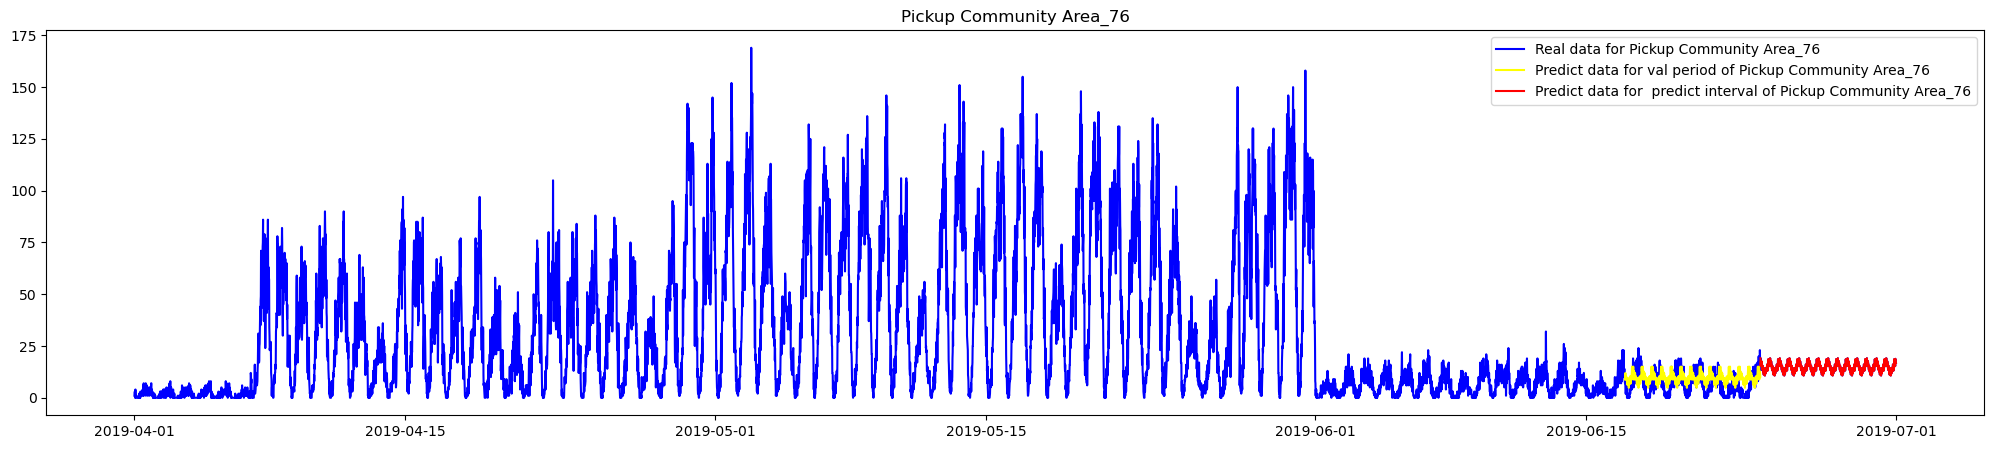

In [43]:
for area in df_total[df_total.columns[76:77]]:
	plt.figure(figsize=(25,5))
	plt.plot(df_total[area], label=f'Real data for {area}', color='blue')
	plt.plot(df_val_predict[area], label=f'Predict data for val period of {area}', color='yellow')
	plt.plot(df_holt_winters_predict[area], label=f'Predict data for  predict interval of {area}', color='red')
	plt.legend(loc='best')
	plt.title(area)
	plt.show()

In [44]:
df_val_predict = df_val_predict.fillna(0)
res_mae = mean_absolute_error(df_val, df_val_predict)
res_mae

0.7913381920102901

In [30]:
print(df_holt_winters_predict.head())

                      Pickup Community Area_0  Pickup Community Area_1  \
Trip Start Timestamp                                                     
2019-06-24 00:00:00                  2.813083                 0.373617   
2019-06-24 00:15:00                  3.770479                 0.483942   
2019-06-24 00:30:00                  2.802732                 0.398782   
2019-06-24 00:45:00                  4.679169                 0.377948   
2019-06-24 01:00:00                  2.811739                 0.373942   

                      Pickup Community Area_2  Pickup Community Area_3  \
Trip Start Timestamp                                                     
2019-06-24 00:00:00                  0.241735                 0.121837   
2019-06-24 00:15:00                  0.389113                 0.176195   
2019-06-24 00:30:00                  0.239235                 0.000000   
2019-06-24 00:45:00                  0.186989                 0.827354   
2019-06-24 01:00:00                  

In [43]:
print(df_val.head())


                      Pickup Community Area_0  Pickup Community Area_1  \
Trip Start Timestamp                                                     
2019-06-17 00:00:00                       6.0                      1.0   
2019-06-17 00:15:00                       3.0                      0.0   
2019-06-17 00:30:00                       4.0                      0.0   
2019-06-17 00:45:00                       1.0                      0.0   
2019-06-17 01:00:00                       1.0                      0.0   

                      Pickup Community Area_2  Pickup Community Area_3  \
Trip Start Timestamp                                                     
2019-06-17 00:00:00                       0.0                      0.0   
2019-06-17 00:15:00                       0.0                      1.0   
2019-06-17 00:30:00                       0.0                      1.0   
2019-06-17 00:45:00                       0.0                      0.0   
2019-06-17 01:00:00                  

In [44]:
print(df_val_predict.head())

                      Pickup Community Area_0  Pickup Community Area_1  \
Trip Start Timestamp                                                     
2019-06-17 00:00:00                  2.561251                      0.0   
2019-06-17 00:15:00                  0.000000                      0.0   
2019-06-17 00:30:00                  0.000000                      0.0   
2019-06-17 00:45:00                  0.000000                      0.0   
2019-06-17 01:00:00                  0.000000                      0.0   

                      Pickup Community Area_2  Pickup Community Area_3  \
Trip Start Timestamp                                                     
2019-06-17 00:00:00                       0.0                 0.000000   
2019-06-17 00:15:00                       0.0                 0.308662   
2019-06-17 00:30:00                       0.0                 0.369646   
2019-06-17 00:45:00                       0.0                 0.467566   
2019-06-17 01:00:00                  

## ARIMA

1. For each area make a prediction with the best SARIMA model according to AIC metrics for this area for the next 673 intervals.
2. Calculate mean absolute error (MAE) for the validation dataset.


1. Для каждой области сделать прогноз с помощью лучшей модели SARIMA по метрикам AIC для этой области на следующие 673 интервала.
2. Рассчитайте среднюю абсолютную ошибку (MAE) для проверочного набора данных.

Определим с помощью теста Дики-Фуллера (Dickey-Fuller test) являются ли ряды по каждой из областей стационарными. Подробнее - https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%81%D1%82_%D0%94%D0%B8%D0%BA%D0%B8_%E2%80%94_%D0%A4%D1%83%D0%BB%D0%BB%D0%B5%D1%80%D0%B0 и https://www.codecamp.ru/blog/dickey-fuller-test-python/

In [45]:
import statsmodels.api as sm

n = 0
for area in df_train:
	p = sm.tsa.stattools.adfuller(df_train[area])[1]
	if p > 0.05:
		print(f'Ряд по области {area} не является стационарным. По критерию Дики-Фуллера p-value = {p}')
if n == 0:
	print(f'Ряды по всем областям являются стационарными. По критерию Дики-Фуллера p-value <= 0.05')

Ряды по всем областям являются стационарными. По критерию Дики-Фуллера p-value <= 0.05


In [59]:
gc.collect()

4264

In [71]:
smodel = pm.auto_arima(df_train['Pickup Community Area_76'],
					   	# start_p=0, start_q=0,
						test='adf',
						# max_p=2, max_q=2,
					   	m=4,
						# start_P=0, start_Q=0,
					   	seasonal=True,
						d=0, D=0,
					   	trace=True,
						error_action='ignore',
					   	# information_criterion='bic',
						suppress_warnings=True,
					  	scoring='mae',
						stepwise=True)

smodel.summary()




Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=54444.073, Time=5.27 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=73311.206, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=55239.509, Time=1.04 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=62026.730, Time=1.17 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=78004.666, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[4] intercept   : AIC=54458.784, Time=2.91 sec
 ARIMA(2,0,2)(1,0,0)[4] intercept   : AIC=54444.475, Time=3.45 sec
 ARIMA(2,0,2)(2,0,1)[4] intercept   : AIC=54448.474, Time=7.69 sec
 ARIMA(2,0,2)(1,0,2)[4] intercept   : AIC=54462.032, Time=7.60 sec
 ARIMA(2,0,2)(0,0,0)[4] intercept   : AIC=54615.604, Time=2.40 sec
 ARIMA(2,0,2)(0,0,2)[4] intercept   : AIC=54441.650, Time=8.20 sec
 ARIMA(1,0,2)(0,0,2)[4] intercept   : AIC=54447.049, Time=1.99 sec
 ARIMA(2,0,1)(0,0,2)[4] intercept   : AIC=54447.320, Time=4.35 sec
 ARIMA(3,0,2)(0,0,2)[4] intercept   : AIC=54445.858, Time=3.88 sec
 ARIMA(2,0,3)(0,0,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 7392
Model:             SARIMAX(2, 0, 3)x(0, 0, [1], 4)   Log Likelihood              -27167.701
Date:                             Sun, 16 Apr 2023   AIC                          54351.403
Time:                                     18:28:04   BIC                          54406.668
Sample:                                          0   HQIC                         54370.394
                                            - 7392                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1016      0.023      4.350      0.000       0.056       0.147
ar.L1          1.9237      0.015    125.559      0.000       1.894       1.954
ar.L2         -0.9268      0.015    -62.034      0.000      -0.956      -0.898
ma.L1         -1.3138      0.017    -76.573      0.000      -1.347      -1.280
ma.L2          0.3157      0.015     21.242      0.000       0.287       0.345
ma.L3          0.0630      0.009      6.902      0.000       0.045       0.081
ma.S.L4        0.1117      0.009     12.580      0.000       0.094       0.129
sigma2        91.3388      0.943     96.849      0.000      89.490      93.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3615.78
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

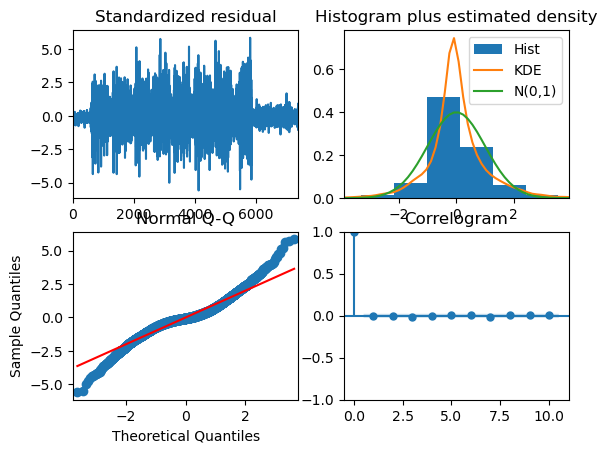

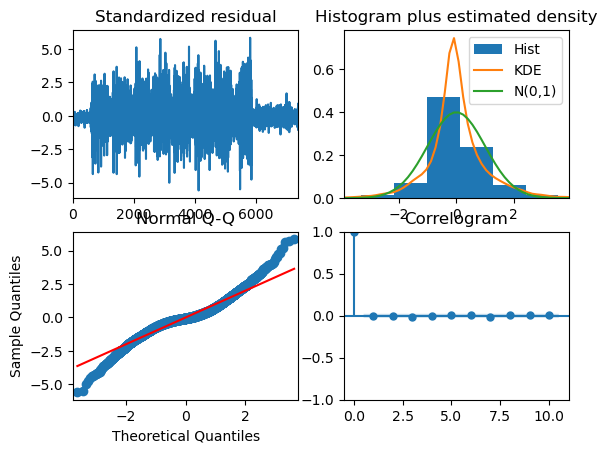

In [61]:
smodel.plot_diagnostics()

In [62]:
prediction = smodel.predict(n_periods=672, dynamic=True)

In [63]:
prediction

array([ 9.97487764, 10.54978554, 10.48302338, 10.73386527, 11.33595548,
       11.82694822, 12.32551989, 12.85063206, 13.39869905, 13.96632564,
       14.55030376, 15.14760886, 15.75539594, 16.37099532, 16.9919082 ,
       17.61580192, 18.24050517, 18.86400295, 19.48443146, 20.10007286,
       20.70934997, 21.31082092, 21.90317378, 22.48522113, 23.05589471,
       23.61423998, 24.15941088, 24.69066447, 25.20735571, 25.70893239,
       26.19492999, 26.66496676, 27.11873882, 27.55601548, 27.97663456,
       28.38049787, 28.7675669 , 29.1378585 , 29.49144084, 29.82842939,
       30.14898315, 30.45330092, 30.74161779, 31.01420175, 31.27135044,
       31.51338804, 31.74066233, 31.95354186, 32.15241328, 32.33767883,
       32.50975389, 32.66906475, 32.8160465 , 32.95114097, 33.0747949 ,
       33.18745814, 33.28958207, 33.38161801, 33.46401587, 33.5372228 ,
       33.60168203, 33.65783172, 33.70610403, 33.74692413, 33.78070943,
       33.80786882, 33.82880203, 33.84389903, 33.85353954, 33.85

In [64]:
df_val_predict = df_val.copy() * 0.0
for area in df_train:

	model = SARIMAX(np.asarray(df_train[area]), order=(2, 0, 3), seasonal_order=(0, 0, 1, 4))
	result = model.fit()
	# df_val_predict[area] = result.predict(len(df[area])-671,len(df_train[area]))
	df_val_predict[area] = result.get_prediction(start=len(df_train[area]), end=len(df_train[area]) + 671).predicted_mean
	# df_val_predict[area] = result.forecast(672)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34672D+00    |proj g|=  8.17412D-01

At iterate    5    f=  3.04634D+00    |proj g|=  6.91336D-03

At iterate   10    f=  3.04455D+00    |proj g|=  1.08018D-02

At iterate   15    f=  3.04324D+00    |proj g|=  7.93341D-04

At iterate   20    f=  3.04305D+00    |proj g|=  7.78371D-03

At iterate   25    f=  3.03786D+00    |proj g|=  2.24139D-02

At iterate   30    f=  3.03710D+00    |proj g|=  3.40882D-03

At iterate   35    f=  3.03709D+00    |proj g|=  1.12550D-04

At iterate   40    f=  3.03709D+00    |proj g|=  3.75998D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67866D+00    |proj g|=  2.59499D-01

At iterate    5    f=  1.64525D+00    |proj g|=  1.17110D-03

At iterate   10    f=  1.64523D+00    |proj g|=  6.70671D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     13     15      1     0     0   9.571D-06   1.645D+00
  F =   1.6452302606509981     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.63137D+00    |proj g|=  1.59332D-03

At iterate   10    f=  1.63090D+00    |proj g|=  1.14159D-02

At iterate   15    f=  1.63077D+00    |proj g|=  1.42199D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     20      1     0     0   1.485D-05   1.631D+00
  F =   1.6307737612406830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11286D+00    |proj g|=  2.64231D-01


 This problem is unconstrained.



At iterate    5    f=  2.07648D+00    |proj g|=  1.19684D-03

At iterate   10    f=  2.07644D+00    |proj g|=  4.79451D-03

At iterate   15    f=  2.07641D+00    |proj g|=  1.38938D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     18      1     0     0   7.111D-06   2.076D+00
  F =   2.0764113689536865     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46130D+00    |proj g|=  1.64798D-01


 This problem is unconstrained.



At iterate    5    f=  1.44671D+00    |proj g|=  1.67220D-03

At iterate   10    f=  1.44669D+00    |proj g|=  1.76156D-03

At iterate   15    f=  1.44663D+00    |proj g|=  1.24788D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     22      1     0     0   1.146D-05   1.447D+00
  F =   1.4466296821457056     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22176D+00    |proj g|=  1.30470D-01

At iterate    5    f=  1.21036D+00    |proj g|=  4.13006D-03

At iterate   10    f=  1.21023D+00    |proj g|=  5.48934D-04

At iterate   15    f=  1.21006D+00    |proj g|=  1.51325D-02

At iterate   20    f=  1.20981D+00    |proj g|=  6.36805D-04

At iterate   25    f=  1.20981D+00    |proj g|=  1.12300D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     28      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.90991D+00    |proj g|=  5.91582D-02

At iterate   10    f=  2.90453D+00    |proj g|=  6.54023D-03

At iterate   15    f=  2.90424D+00    |proj g|=  2.91074D-03

At iterate   20    f=  2.90422D+00    |proj g|=  1.18670D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     23      1     0     0   1.187D-05   2.904D+00
  F =   2.9042211567003342     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.46986D+00    |proj g|=  3.25331D-03

At iterate   10    f=  2.46974D+00    |proj g|=  5.36123D-03

At iterate   15    f=  2.46967D+00    |proj g|=  2.22004D-04

At iterate   20    f=  2.46966D+00    |proj g|=  3.49935D-03

At iterate   25    f=  2.46903D+00    |proj g|=  9.84821D-03

At iterate   30    f=  2.46872D+00    |proj g|=  9.76498D-04

At iterate   35    f=  2.46872D+00    |proj g|=  8.24238D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     42      1     0     0   3.309D-05   2.469D+00
  F =   2.4687191302073641     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  7.47412D+00    |proj g|=  2.26613D+00

At iterate   10    f=  5.05768D+00    |proj g|=  5.41495D-01

At iterate   15    f=  4.23548D+00    |proj g|=  2.60466D-01

At iterate   20    f=  4.14690D+00    |proj g|=  2.95479D-02

At iterate   25    f=  4.13817D+00    |proj g|=  4.14663D-02

At iterate   30    f=  4.12988D+00    |proj g|=  9.90968D-03

At iterate   35    f=  4.12831D+00    |proj g|=  1.19911D-03

At iterate   40    f=  4.12830D+00    |proj g|=  1.77865D-03

At iterate   45    f=  4.12790D+00    |proj g|=  7.38253D-03


/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  4.12737D+00    |proj g|=  1.20991D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56      1     0     0   1.210D-03   4.127D+00
  F =   4.1273707176931831     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.09993D-01    |proj g|=  5.84138D-02

At iterate    5    f= -6.10477D-01    |proj g|=  7.18227D-03

At iterate   10    f= -6.10643D-01    |proj g|=  1.16161D-01

At iter

/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate   50    f= -6.14836D-01    |proj g|=  6.18512D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   6.185D-03  -6.148D-01
  F = -0.61483641892233343     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45918D+01    |proj g|=  5.32338D+01

At iterate    5    f=  7.98984D-01    |proj g|=  1.46694D-01

At iterate   10    f=  7.73846D-01    |proj g|=  4.26083D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  1.25741D+00    |proj g|=  5.31172D-03

At iterate   10    f=  1.25737D+00    |proj g|=  4.64843D-04

At iterate   15    f=  1.25735D+00    |proj g|=  3.63597D-04

At iterate   20    f=  1.25735D+00    |proj g|=  2.80766D-05

At iterate   25    f=  1.25735D+00    |proj g|=  1.33317D-03

At iterate   30    f=  1.25733D+00    |proj g|=  9.54306D-04

At iterate   35    f=  1.25731D+00    |proj g|=  8.47141D-04

At iterate   40    f=  1.25731D+00    |proj g|=  1.31861D-04

At iterate   45    f=  1.25731D+00    |proj g|=  1.90595D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     56   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96792D-01    |proj g|=  1.10151D-01

At iterate    5    f=  3.89153D-01    |proj g|=  4.11471D-02

At iterate   10    f=  3.87974D-01    |proj g|=  1.15139D-02

At iterate   15    f=  3.87400D-01    |proj g|=  1.41854D-02

At iterate   20    f=  3.86924D-01    |proj g|=  7.72055D-04

At iterate   25    f=  3.86924D-01    |proj g|=  6.40416D-05

At iterate   30    f=  3.86921D-01    |proj g|=  2.68880D-03

At iterate   35    f=  3.86873D-01    |proj g|=  6.80398D-03

At iterate   40    f=  3.86846D-01    |proj g|=  9.24472D-04

At iterate   45    f=  3.86798D-01    |proj g|=  3.47050D-03


/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



At iterate   50    f=  3.86694D-01    |proj g|=  5.08443D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   5.084D-03   3.867D-01
  F =  0.38669386675282874     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14253D-01    |proj g|=  4.33588D-01


 This problem is unconstrained.



At iterate    5    f=  8.36430D-01    |proj g|=  2.26518D-02

At iterate   10    f=  8.11109D-01    |proj g|=  1.02176D-01

At iterate   15    f=  7.86666D-01    |proj g|=  1.60763D-01

At iterate   20    f=  7.84640D-01    |proj g|=  8.55418D-04

At iterate   25    f=  7.84628D-01    |proj g|=  1.09326D-04

At iterate   30    f=  7.84627D-01    |proj g|=  3.75665D-04

At iterate   35    f=  7.84620D-01    |proj g|=  4.20321D-03

At iterate   40    f=  7.84578D-01    |proj g|=  5.72520D-03

At iterate   45    f=  7.84544D-01    |proj g|=  3.34784D-03


/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.84514D-01    |proj g|=  2.13001D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58      1     0     0   2.130D-03   7.845D-01
  F =  0.78451415694836812     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22332D+00    |proj g|=  1.31962D-01


 This problem is unconstrained.



At iterate    5    f=  1.21225D+00    |proj g|=  8.84941D-03

At iterate   10    f=  1.21188D+00    |proj g|=  3.98143D-04

At iterate   15    f=  1.21172D+00    |proj g|=  8.01409D-03

At iterate   20    f=  1.21137D+00    |proj g|=  1.71182D-03

At iterate   25    f=  1.21137D+00    |proj g|=  2.04409D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     35      1     0     0   8.538D-06   1.211D+00
  F =   1.2113686941522019     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.07452D+00    |proj g|=  8.02849D-03

At iterate   10    f=  1.07426D+00    |proj g|=  3.98066D-04

At iterate   15    f=  1.07425D+00    |proj g|=  2.02910D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     22      1     0     0   2.362D-05   1.074D+00
  F =   1.0742529954060243     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47383D+00    |proj g|=  1.67039D-01

At iterate    5    f=  1.45330D+00    |proj g|=  1.64768D-02

At iterate   10    f=  1.45236D+00    |proj g|=  7.99458D-03

At iterate   15    f=  1.45167D+00    |proj g|=  1.70914D-04

At iterate   20    f=  1.45167D+00    |proj g|=  1.68894D-04

At iterate   25    f=  1.45167D+00    |proj g|=  4.77758D-05

At iterate   30    f=  1.45167D+00    |proj g|=  3.50336D-04

At iterate   35    f=  1.45166D+00    |proj g|=  7.20683D-04

At iterate   40    f=  1.45165D+00    |proj g|=  2.27181D-03

At iterate   45    f=  1.45164D+00    |proj g|=  5.23524D-04

At iterate   50    f=  1.45162D+00    |proj g|=  6.33264D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.02968D+01    |proj g|=  1.17772D+02

At iterate    5    f=  3.67998D-01    |proj g|=  2.49635D-01

At iterate   10    f=  3.34057D-01    |proj g|=  1.29554D-02

At iterate   15    f=  3.26484D-01    |proj g|=  8.81676D-02

At iterate   20    f=  3.22754D-01    |proj g|=  1.19675D-02

At iterate   25    f=  3.22676D-01    |proj g|=  2.20443D-03

At iterate   30    f=  3.22610D-01    |proj g|=  2.31301D-03

At iterate   35    f=  3.22609D-01    |proj g|=  3.39456D-03

At iterate   40    f=  3.22582D-01    |proj g|=  3.20816D-03

At iterate   45    f=  3.22557D-01    |proj g|=  2.51159D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47262D+01    |proj g|=  1.77749D+02

At iterate    5    f= -2.99848D-01    |proj g|=  1.96874D-01

At iterate   10    f= -3.59577D-01    |proj g|=  2.66657D-02

At iterate   15    f= -3.60676D-01    |proj g|=  8.08059D-03

At iterate   20    f= -3.65832D-01    |proj g|=  1.25256D-01

At iterate   25    f= -3.67411D-01    |proj g|=  2.32027D-03

At iterate   30    f= -3.67433D-01    |proj g|=  2.07644D-02

At iterate   35    f= -3.67438D-01    |proj g|=  5.98749D-04

At iterate   40    f= -3.67440D-01    |proj g|=  1.16995D-03

At iterate   45    f= -3.67453D-01    |proj g|=  6.31490D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  4.87293D-01    |proj g|=  5.40172D-02

At iterate   10    f=  4.83520D-01    |proj g|=  1.38062D-02

At iterate   15    f=  4.82060D-01    |proj g|=  1.97038D-02

At iterate   20    f=  4.79545D-01    |proj g|=  2.21073D-02

At iterate   25    f=  4.77592D-01    |proj g|=  4.32900D-03

At iterate   30    f=  4.77417D-01    |proj g|=  1.21704D-03

At iterate   35    f=  4.77413D-01    |proj g|=  6.81923D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     43      1     0     0   5.351D-05   4.774D-01
  F =  0.47741313767007276     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  8.67914D-02    |proj g|=  1.07377D-02

At iterate   10    f=  8.67129D-02    |proj g|=  7.18994D-03

At iterate   15    f=  8.61956D-02    |proj g|=  1.16011D-01

At iterate   20    f=  7.38877D-02    |proj g|=  7.05366D-02

At iterate   25    f=  5.86087D-02    |proj g|=  4.83989D-02

At iterate   30    f=  5.64041D-02    |proj g|=  1.12721D-03

At iterate   35    f=  5.62483D-02    |proj g|=  1.24029D-02

At iterate   40    f=  5.61344D-02    |proj g|=  4.29266D-04

At iterate   45    f=  5.60839D-02    |proj g|=  1.55648D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     59   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32065D+00    |proj g|=  1.75906D-01

At iterate    5    f=  1.30306D+00    |proj g|=  4.30854D-03

At iterate   10    f=  1.30281D+00    |proj g|=  6.38789D-03

At iterate   15    f=  1.30278D+00    |proj g|=  6.47467D-05

At iterate   20    f=  1.30278D+00    |proj g|=  1.85217D-03

At iterate   25    f=  1.30275D+00    |proj g|=  7.85645D-04

At iterate   30    f=  1.30274D+00    |proj g|=  3.46130D-04

At iterate   35    f=  1.30273D+00    |proj g|=  7.19490D-04

At iterate   40    f=  1.30271D+00    |proj g|=  2.33208D-03

At iterate   45    f=  1.30270D+00    |proj g|=  1.32257D-03


/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.30262D+00    |proj g|=  1.54442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62      1     0     0   1.544D-03   1.303D+00
  F =   1.3026219379758590     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58351D+00    |proj g|=  2.40110D-01

At iterate    5    f=  1.55382D+00    |proj g|=  1.15429D-02

At iterate   10    f=  1.55351D+00    |proj g|=  1.09814D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  6.68600D-01    |proj g|=  1.30864D-01

At iterate   10    f=  6.42006D-01    |proj g|=  4.67723D-02

At iterate   15    f=  6.20211D-01    |proj g|=  2.25708D-02

At iterate   20    f=  6.17814D-01    |proj g|=  6.27202D-03

At iterate   25    f=  6.17747D-01    |proj g|=  1.00503D-02

At iterate   30    f=  6.17696D-01    |proj g|=  4.40712D-04

At iterate   35    f=  6.17695D-01    |proj g|=  7.61140D-04

At iterate   40    f=  6.17689D-01    |proj g|=  2.01497D-03

At iterate   45    f=  6.17688D-01    |proj g|=  5.45452D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     56   

 This problem is unconstrained.



At iterate    5    f=  2.20085D+00    |proj g|=  8.51907D-02

At iterate   10    f=  2.08656D+00    |proj g|=  5.09670D-02

At iterate   15    f=  2.08160D+00    |proj g|=  4.97750D-03

At iterate   20    f=  2.08148D+00    |proj g|=  1.51529D-04

At iterate   25    f=  2.08145D+00    |proj g|=  2.03711D-03

At iterate   30    f=  2.08129D+00    |proj g|=  1.18983D-03

At iterate   35    f=  2.08125D+00    |proj g|=  6.99910D-04

At iterate   40    f=  2.08124D+00    |proj g|=  1.36806D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     45      1     0     0   2.586D-06   2.081D+00
  F =   2.08123811038

 This problem is unconstrained.



At iterate    5    f=  7.43919D-01    |proj g|=  5.37857D-01

At iterate   10    f=  7.12453D-01    |proj g|=  1.71901D-02

At iterate   15    f=  6.98704D-01    |proj g|=  2.42080D-02

At iterate   20    f=  6.97476D-01    |proj g|=  2.67438D-03

At iterate   25    f=  6.97336D-01    |proj g|=  5.07793D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     33      1     0     0   7.409D-06   6.973D-01
  F =  0.69733638192338909     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f= -1.85558D-01    |proj g|=  2.33484D-02

At iterate   10    f= -1.85614D-01    |proj g|=  1.36514D-03

At iterate   15    f= -1.85625D-01    |proj g|=  1.14259D-02

At iterate   20    f= -1.86570D-01    |proj g|=  5.50649D-02

At iterate   25    f= -1.94334D-01    |proj g|=  4.14041D-02

At iterate   30    f= -1.98034D-01    |proj g|=  4.64727D-03

At iterate   35    f= -2.00475D-01    |proj g|=  7.98999D-04

At iterate   40    f= -2.00789D-01    |proj g|=  1.62998D-02

At iterate   45    f= -2.00964D-01    |proj g|=  4.07033D-03


/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f= -2.01092D-01    |proj g|=  9.49525D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   9.495D-03  -2.011D-01
  F = -0.20109213833021583     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.21582D-01    |proj g|=  1.19791D-01

At iterate    5    f=  6.13152D-01    |proj g|=  7.97737D-03

At iterate   10    f=  6.12234D-01    |proj g|=  3.30158D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     60      1     0     0   5.367D-05   6.119D-01
  F =  0.61194161271239822     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.76462D+00    |proj g|=  2.35748D-01

At iterate    5    f=  3.73493D+00    |proj g|=  1.09131D-02

At iterate   10    f=  3.73200D+00    |proj g|=  1.40657D-03

At iterate   15    f=  3.73185D+00    |proj g|=  1.77084D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  2.58538D-01    |proj g|=  4.43488D-02

At iterate   10    f=  2.57608D-01    |proj g|=  2.54210D-02

At iterate   15    f=  2.56085D-01    |proj g|=  4.24837D-03

At iterate   20    f=  2.56074D-01    |proj g|=  1.17194D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     26      1     0     0   5.110D-05   2.561D-01
  F =  0.25607354812408079     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  9.92309D-02    |proj g|=  2.25948D-02

At iterate   10    f=  9.79405D-02    |proj g|=  2.82199D-03

At iterate   15    f=  9.65941D-02    |proj g|=  2.84261D-02

At iterate   20    f=  9.38297D-02    |proj g|=  5.04664D-03

At iterate   25    f=  9.36037D-02    |proj g|=  1.83609D-02

At iterate   30    f=  9.35279D-02    |proj g|=  4.25718D-03

At iterate   35    f=  9.35127D-02    |proj g|=  3.47881D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     46      1     0     0   5.179D-05   9.351D-02
  F =   9.3512677981298475E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.26514D-01    |proj g|=  3.51096D-02

At iterate   10    f=  6.25114D-01    |proj g|=  2.85704D-03

At iterate   15    f=  6.23592D-01    |proj g|=  6.23648D-03

At iterate   20    f=  6.22373D-01    |proj g|=  1.38990D-03

At iterate   25    f=  6.22362D-01    |proj g|=  1.73961D-03

At iterate   30    f=  6.22356D-01    |proj g|=  2.84439D-03

At iterate   35    f=  6.22349D-01    |proj g|=  2.86482D-03

At iterate   40    f=  6.22334D-01    |proj g|=  5.29980D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     50      1     0     0   3.338D-05   6.223D-01
  F =  0.622333513582

 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.29762D+00    |proj g|=  3.21085D-01

At iterate    5    f=  4.25246D+00    |proj g|=  1.04197D-02

At iterate   10    f=  4.24920D+00    |proj g|=  3.35754D-03

At iterate   15    f=  4.24889D+00    |proj g|=  9.85530D-03

At iterate   20    f=  4.24880D+00    |proj g|=  1.25514D-03

At iterate   25    f=  4.24853D+00    |proj g|=  9.06185D-03

At iterate   30    f=  4.24828D+00    |proj g|=  8.87647D-04

At iterate   35    f=  4.24828D+00    |proj g|=  2.93941D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     40      1     

 This problem is unconstrained.



At iterate    5    f=  2.96548D+00    |proj g|=  9.69519D-02

At iterate   10    f=  2.95405D+00    |proj g|=  1.22302D-02

At iterate   15    f=  2.95255D+00    |proj g|=  1.13609D-02

At iterate   20    f=  2.95242D+00    |proj g|=  2.16456D-03

At iterate   25    f=  2.95117D+00    |proj g|=  1.10443D-02

At iterate   30    f=  2.95041D+00    |proj g|=  4.16128D-03

At iterate   35    f=  2.95035D+00    |proj g|=  6.16732D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     40      1     0     0   6.808D-06   2.950D+00
  F =   2.9503496351592413     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  1.18431D+00    |proj g|=  5.31836D-03

At iterate   10    f=  1.18415D+00    |proj g|=  3.79157D-03

At iterate   15    f=  1.18412D+00    |proj g|=  3.65320D-03

At iterate   20    f=  1.18379D+00    |proj g|=  3.86859D-03

At iterate   25    f=  1.18375D+00    |proj g|=  2.36029D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     30      1     0     0   1.364D-05   1.184D+00
  F =   1.1837492891322272     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29194D+00    |proj g|=  1.90851D-01

At iterate    5    f=  1.27480D+00    |proj g|=  1.60044D-03

At iterate   10    f=  1.27466D+00    |proj g|=  3.22477D-03

At iterate   15    f=  1.27464D+00    |proj g|=  7.47258D-05

At iterate   20    f=  1.27464D+00    |proj g|=  3.47932D-04

At iterate   25    f=  1.27461D+00    |proj g|=  4.72617D-03

At iterate   30    f=  1.27460D+00    |proj g|=  1.04390D-03

At iterate   35    f=  1.27458D+00    |proj g|=  1.07934D-03

At iterate   40    f=  1.27455D+00    |proj g|=  1.72020D-03

At iterate   45    f=  1.27448D+00    |proj g|=  4.07788D-03


/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.27446D+00    |proj g|=  8.27259D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   8.273D-04   1.274D+00
  F =   1.2744569756913009     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.49879D-01    |proj g|=  2.59007D-01

At iterate    5    f=  2.25531D-01    |proj g|=  2.28484D-02

At iterate   10    f=  2.25131D-01    |proj g|=  1.20309D-02

At iterate   15    f=  2.23698D-01    |proj g|=  3.55059D-01

At iterate   20    f=  2.02537D-01    |proj g|=  5.93703D-02

At iterate   25    f=  2.00190D-01    |proj g|=  5.32389D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     34      1     0     0   

 This problem is unconstrained.



At iterate    5    f= -4.82789D-02    |proj g|=  2.83371D-02

At iterate   10    f= -5.01878D-02    |proj g|=  6.34813D-03

At iterate   15    f= -5.02132D-02    |proj g|=  1.08208D-02

At iterate   20    f= -5.06697D-02    |proj g|=  6.52095D-02

At iterate   25    f= -5.21507D-02    |proj g|=  9.61642D-03

At iterate   30    f= -5.25090D-02    |proj g|=  2.20604D-02

At iterate   35    f= -5.28513D-02    |proj g|=  6.27861D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     48      1     0     0   2.849D-04  -5.285D-02
  F =  -5.2852152031949158E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  7.37707D-01    |proj g|=  4.01934D-03

At iterate   10    f=  7.37615D-01    |proj g|=  2.94578D-03

At iterate   15    f=  7.36445D-01    |proj g|=  4.14975D-02

At iterate   20    f=  7.34802D-01    |proj g|=  2.99889D-03

At iterate   25    f=  7.34782D-01    |proj g|=  1.55031D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     31      1     0     0   1.655D-06   7.348D-01
  F =  0.73478224862015673     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  9.45183D-01    |proj g|=  3.26188D-03

At iterate   10    f=  9.44910D-01    |proj g|=  3.15413D-03

At iterate   15    f=  9.44894D-01    |proj g|=  4.37902D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     21      1     0     0   1.410D-05   9.449D-01
  F =  0.94489384451056047     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57093D+00    |proj g|=  4.36863D+01


 This problem is unconstrained.



At iterate    5    f=  6.89052D-02    |proj g|=  4.99892D-01

At iterate   10    f=  4.42411D-02    |proj g|=  2.96824D-02

At iterate   15    f=  3.80054D-02    |proj g|=  4.80620D-02

At iterate   20    f=  3.50649D-02    |proj g|=  6.39272D-03

At iterate   25    f=  3.50420D-02    |proj g|=  1.48048D-03

At iterate   30    f=  3.50306D-02    |proj g|=  5.45827D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     47      1     0     0   8.665D-05   3.503D-02
  F =   3.5030564822202882E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.50770D+00    |proj g|=  1.45238D-03

At iterate   10    f=  1.50750D+00    |proj g|=  7.40609D-03

At iterate   15    f=  1.50746D+00    |proj g|=  1.60509D-03

At iterate   20    f=  1.50685D+00    |proj g|=  2.56733D-02

At iterate   25    f=  1.50548D+00    |proj g|=  7.66614D-03

At iterate   30    f=  1.50484D+00    |proj g|=  1.74857D-02

At iterate   35    f=  1.50430D+00    |proj g|=  3.58843D-03

At iterate   40    f=  1.50395D+00    |proj g|=  2.18420D-03

At iterate   45    f=  1.50363D+00    |proj g|=  2.66808D-03

At iterate   50    f=  1.50357D+00    |proj g|=  9.62139D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.88233D-01    |proj g|=  3.54078D-01


 This problem is unconstrained.



At iterate    5    f=  6.34628D-01    |proj g|=  3.26467D-02

At iterate   10    f=  6.33060D-01    |proj g|=  6.59255D-02

At iterate   15    f=  6.03816D-01    |proj g|=  3.25055D-02

At iterate   20    f=  5.96093D-01    |proj g|=  1.41034D-02

At iterate   25    f=  5.95945D-01    |proj g|=  2.98501D-04

At iterate   30    f=  5.95944D-01    |proj g|=  8.99972D-05

At iterate   35    f=  5.95944D-01    |proj g|=  1.56720D-03

At iterate   40    f=  5.95930D-01    |proj g|=  4.40946D-04

At iterate   45    f=  5.95929D-01    |proj g|=  6.65700D-05

At iterate   50    f=  5.95929D-01    |proj g|=  1.45735D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.88639D-01    |proj g|=  1.22589D-01

At iterate    5    f=  7.79877D-01    |proj g|=  1.04633D-02

At iterate   10    f=  7.79203D-01    |proj g|=  1.78961D-03

At iterate   15    f=  7.78655D-01    |proj g|=  1.95682D-02

At iterate   20    f=  7.78323D-01    |proj g|=  3.08110D-03

At iterate   25    f=  7.78312D-01    |proj g|=  3.25512D-05

At iterate   30    f=  7.78312D-01    |proj g|=  7.81323D-04

At iterate   35    f=  7.78302D-01    |proj g|=  4.20859D-03

At iterate   40    f=  7.78293D-01    |proj g|=  1.12630D-03

At iterate   45    f=  7.78291D-01    |proj g|=  1.16016D-03

At iterate   50    f=  7.78288D-01    |proj g|=  1.92152D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.75536D-01    |proj g|=  4.48965D-01

At iterate    5    f=  7.12904D-01    |proj g|=  2.24471D-02

At iterate   10    f=  7.08611D-01    |proj g|=  1.00219D-01

At iterate   15    f=  6.65915D-01    |proj g|=  9.80702D-02

At iterate   20    f=  6.61049D-01    |proj g|=  7.27865D-04

At iterate   25    f=  6.61041D-01    |proj g|=  5.55473D-05

At iterate   30    f=  6.61037D-01    |proj g|=  1.56310D-03

At iterate   35    f=  6.61008D-01    |proj g|=  8.28952D-04

At iterate   40    f=  6.61005D-01    |proj g|=  9.72964D-05

At iterate   45    f=  6.61005D-01    |proj g|=  3.02557D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  3.65199D-02    |proj g|=  1.76616D-01

At iterate   10    f=  5.34087D-04    |proj g|=  3.23246D-02

At iterate   15    f= -4.54330D-03    |proj g|=  6.72338D-02

At iterate   20    f= -9.34890D-03    |proj g|=  2.77718D-02

At iterate   25    f= -1.12453D-02    |proj g|=  2.13049D-02

At iterate   30    f= -1.16467D-02    |proj g|=  2.22795D-03

At iterate   35    f= -1.17533D-02    |proj g|=  7.04646D-03

At iterate   40    f= -1.17622D-02    |proj g|=  2.27827D-03

At iterate   45    f= -1.17952D-02    |proj g|=  1.11882D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     65   

 This problem is unconstrained.



At iterate    5    f=  2.92824D-01    |proj g|=  2.56778D-02

At iterate   10    f=  2.92580D-01    |proj g|=  6.77514D-03

At iterate   15    f=  2.92572D-01    |proj g|=  2.14372D-04

At iterate   20    f=  2.92571D-01    |proj g|=  3.78118D-03

At iterate   25    f=  2.92568D-01    |proj g|=  1.14136D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     33      1     0     0   3.562D-05   2.926D-01
  F =  0.29256845174072732     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.51920D+00    |proj g|=  9.47144D-01

At iterate   10    f=  4.86856D-01    |proj g|=  3.86882D-01

At iterate   15    f=  7.12046D-02    |proj g|=  1.30971D+00

At iterate   20    f= -8.36671D-02    |proj g|=  1.41022D-01

At iterate   25    f= -1.09693D-01    |proj g|=  1.37514D-02

At iterate   30    f= -1.17573D-01    |proj g|=  4.00699D-02

At iterate   35    f= -1.21988D-01    |proj g|=  2.65384D-03

At iterate   40    f= -1.21996D-01    |proj g|=  8.82171D-04

At iterate   45    f= -1.22359D-01    |proj g|=  1.53274D-02


/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f= -1.22557D-01    |proj g|=  1.15203D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     78      1     0     0   1.152D-02  -1.226D-01
  F = -0.12255662541086446     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98324D-01    |proj g|=  2.94255D-01

At iterate    5    f=  2.80436D-01    |proj g|=  1.86547D-02

At iterate   10    f=  2.80193D-01    |proj g|=  3.16010D-02

At iter

/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  2.50302D-01    |proj g|=  4.43389D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   4.434D-03   2.503D-01
  F =  0.25030226672233896     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54237D+00    |proj g|=  2.34557D+01

At iterate    5    f=  5.78103D-01    |proj g|=  2.72350D-02

At iterate   10    f=  5.57766D-01    |proj g|=  1.28295D-01

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.61960D-02    |proj g|=  5.06362D-02

At iterate    5    f= -9.74923D-02    |proj g|=  1.84777D-02

At iterate   10    f= -9.76522D-02    |proj g|=  1.28765D-02

At iterate   15    f= -9.83103D-02    |proj g|=  4.87562D-02

At iterate   20    f= -1.00049D-01    |proj g|=  1.45488D-02

At iterate   25    f= -1.00427D-01    |proj g|=  2.05048D-02

At iterate   30    f= -1.01555D-01    |proj g|=  3.75557D-03

At iterate   35    f= -1.01688D-01    |proj g|=  3.46577D-03

At iterate   40    f= -1.01846D-01    |proj g|=  2.93617D-02

At iterate   45    f= -1.01940D-01    |proj g|=  1.19516D-03


/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f= -1.01943D-01    |proj g|=  1.74926D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   1.749D-04  -1.019D-01
  F = -0.10194325035620756     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74326D-01    |proj g|=  8.33889D-02

At iterate    5    f=  1.70576D-01    |proj g|=  2.21200D-02

At iterate   10    f=  1.70083D-01    |proj g|=  4.76060D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.21457D-01    |proj g|=  3.19577D-02

At iterate    5    f= -6.22003D-01    |proj g|=  7.96434D-04

At iterate   10    f= -6.22007D-01    |proj g|=  2.40864D-03

At iterate   15    f= -6.22218D-01    |proj g|=  1.14994D-01

At iterate   20    f= -6.24369D-01    |proj g|=  2.20194D-02

At iterate   25    f= -6.25399D-01    |proj g|=  2.27667D-02

At iterate   30    f= -6.26486D-01    |proj g|=  1.84910D-01

At iterate   35    f= -6.26788D-01    |proj g|=  6.73373D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63606D+00    |proj g|=  4.47664D+01

At iterate    5    f=  3.28104D-01    |proj g|=  1.24924D-01

At iterate   10    f=  3.06308D-01    |proj g|=  2.77862D-02

At iterate   15    f=  3.01177D-01    |proj g|=  4.66755D-02

At iterate   20    f=  2.98933D-01    |proj g|=  1.88141D-03

At iterate   25    f=  2.98932D-01    |proj g|=  3.00652D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     38      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.52254D-01    |proj g|=  4.44541D-02

At iterate    5    f= -5.53347D-01    |proj g|=  2.30140D-02

At iterate   10    f= -5.53444D-01    |proj g|=  2.03299D-02

At iterate   15    f= -5.53829D-01    |proj g|=  1.40112D-01

At iterate   20    f= -5.55867D-01    |proj g|=  3.99509D-02

At iterate   25    f= -5.56161D-01    |proj g|=  2.69119D-03

At iterate   30    f= -5.56165D-01    |proj g|=  4.53563D-04

At iterate   35    f= -5.56171D-01    |proj g|=  1.90655D-02

At iterate   40    f= -5.56705D-01    |proj g|=  3.72116D-02

At iterate   45    f= -5.57602D-01    |proj g|=  4.93889D-02

At iterate   50    f= -5.57703D-01    |proj g|=  6.28555D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.25988D-01    |proj g|=  3.49401D-02


 This problem is unconstrained.



At iterate    5    f= -8.27048D-01    |proj g|=  2.71930D-02

At iterate   10    f= -8.27089D-01    |proj g|=  1.33748D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     11     14      1     0     0   1.886D-04  -8.271D-01
  F = -0.82708874274525934     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87559D+00    |proj g|=  2.87406D-01


 This problem is unconstrained.



At iterate    5    f=  2.82767D+00    |proj g|=  4.07747D-03

At iterate   10    f=  2.82752D+00    |proj g|=  3.10108D-03

At iterate   15    f=  2.82709D+00    |proj g|=  1.81856D-03

At iterate   20    f=  2.82706D+00    |proj g|=  2.60869D-03

At iterate   25    f=  2.82478D+00    |proj g|=  1.49692D-02

At iterate   30    f=  2.82375D+00    |proj g|=  3.34695D-03

At iterate   35    f=  2.82365D+00    |proj g|=  2.82160D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     42      1     0     0   5.008D-05   2.824D+00
  F =   2.8236508409005676     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -4.12399D-01    |proj g|=  1.41075D-02

At iterate   10    f= -4.12512D-01    |proj g|=  7.99302D-02

At iterate   15    f= -4.13175D-01    |proj g|=  6.23078D-02

At iterate   20    f= -4.16099D-01    |proj g|=  4.36705D-02

At iterate   25    f= -4.18053D-01    |proj g|=  9.74478D-02

At iterate   30    f= -4.19680D-01    |proj g|=  3.42566D-03

At iterate   35    f= -4.20072D-01    |proj g|=  1.22575D-02

At iterate   40    f= -4.20143D-01    |proj g|=  4.30223D-02

At iterate   45    f= -4.20199D-01    |proj g|=  5.65971D-04


/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -4.20200D-01    |proj g|=  3.16082D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   3.161D-06  -4.202D-01
  F = -0.42019998391940877     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57816D+00    |proj g|=  6.19843D+01


 This problem is unconstrained.



At iterate    5    f= -4.64848D-02    |proj g|=  5.96339D-01

At iterate   10    f= -1.13666D-01    |proj g|=  4.95801D-02

At iterate   15    f= -1.16680D-01    |proj g|=  2.16046D-02

At iterate   20    f= -1.17876D-01    |proj g|=  3.98275D-02

At iterate   25    f= -1.18040D-01    |proj g|=  2.55825D-03

At iterate   30    f= -1.18046D-01    |proj g|=  8.13946D-03

At iterate   35    f= -1.18337D-01    |proj g|=  1.86220D-02

At iterate   40    f= -1.18558D-01    |proj g|=  1.06542D-03

At iterate   45    f= -1.18569D-01    |proj g|=  8.98626D-04


/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f= -1.18570D-01    |proj g|=  7.26579D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   7.266D-05  -1.186D-01
  F = -0.11856979211267399     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40325D+00    |proj g|=  3.17725D-01

At iterate    5    f=  1.35490D+00    |proj g|=  2.11250D-02

At iterate   10    f=  1.35460D+00    |proj g|=  3.34803D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  3.52146D-01    |proj g|=  3.48676D-02

At iterate   10    f=  3.50403D-01    |proj g|=  4.12929D-03

At iterate   15    f=  3.49272D-01    |proj g|=  1.52335D-02

At iterate   20    f=  3.45039D-01    |proj g|=  1.00889D-02

At iterate   25    f=  3.44877D-01    |proj g|=  1.21751D-02

At iterate   30    f=  3.44813D-01    |proj g|=  3.07082D-04

At iterate   35    f=  3.44812D-01    |proj g|=  3.59587D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     43      1     0     0   1.486D-05   3.448D-01
  F =  0.34481238757335853     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.88227D-01    |proj g|=  1.93962D-02

At iterate   10    f=  1.87518D-01    |proj g|=  2.02403D-03

At iterate   15    f=  1.87482D-01    |proj g|=  4.84894D-03

At iterate   20    f=  1.87205D-01    |proj g|=  7.00519D-03

At iterate   25    f=  1.87202D-01    |proj g|=  2.08605D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     33      1     0     0   3.735D-05   1.872D-01
  F =  0.18720164110505455     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f= -4.58825D-01    |proj g|=  2.40585D-02

At iterate   10    f= -4.58966D-01    |proj g|=  3.32766D-02

At iterate   15    f= -4.59304D-01    |proj g|=  7.22412D-02

At iterate   20    f= -4.59418D-01    |proj g|=  4.38830D-02

At iterate   25    f= -4.59468D-01    |proj g|=  3.84281D-03

At iterate   30    f= -4.59488D-01    |proj g|=  2.43414D-02

At iterate   35    f= -4.60161D-01    |proj g|=  1.39529D-01

At iterate   40    f= -4.61281D-01    |proj g|=  2.22388D-02

At iterate   45    f= -4.61816D-01    |proj g|=  6.06129D-02


/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f= -4.62582D-01    |proj g|=  1.96156D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   1.962D-02  -4.626D-01
  F = -0.46258230563414199     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.75766D-01    |proj g|=  2.57107D-02

At iterate    5    f= -5.76159D-01    |proj g|=  1.03281D-02

At iterate   10    f= -5.76182D-01    |proj g|=  1.90529D-02

At iter

 This problem is unconstrained.



At iterate    5    f= -4.07232D-01    |proj g|=  2.55973D-02

At iterate   10    f= -4.07281D-01    |proj g|=  1.22604D-03

At iterate   15    f= -4.07282D-01    |proj g|=  1.49054D-03

At iterate   20    f= -4.07290D-01    |proj g|=  1.64090D-02

At iterate   25    f= -4.16637D-01    |proj g|=  6.14915D-02

At iterate   30    f= -4.19291D-01    |proj g|=  3.54066D-02

At iterate   35    f= -4.19775D-01    |proj g|=  6.65257D-02

At iterate   40    f= -4.19974D-01    |proj g|=  6.31911D-03

At iterate   45    f= -4.19974D-01    |proj g|=  1.94802D-04


/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f= -4.19975D-01    |proj g|=  5.48708D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   5.487D-03  -4.200D-01
  F = -0.41997469742652127     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.12460D-01    |proj g|=  4.39672D-02

At iterate    5    f= -3.13630D-01    |proj g|=  3.38137D-03

At iterate   10    f= -3.14052D-01    |proj g|=  5.40204D-02

At iter

/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.92600D-03    |proj g|=  7.80500D-02

At iterate    5    f= -8.35208D-03    |proj g|=  8.20560D-03

At iterate   10    f= -8.57613D-03    |proj g|=  1.23900D-02

At iterate   15    f= -9.00938D-03    |proj g|=  7.82390D-02

At iterate   20    f= -9.84947D-03    |proj g|=  7.00329D-03

At iterate   25    f= -1.06578D-02    |proj g|=  3.31437D-02

At iterate   30    f= -1.15088D-02    |proj g|=  4.15055D-03

At iterate   35    f= -1.15966D-02    |proj g|=  7.74084D-04

At iterate   40    f= -1.16034D-02    |proj g|=  5.77862D-04

At iterate   45    f= -1.16090D-02    |proj g|=  5.84846D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  5.57970D-02    |proj g|=  3.39378D-02

At iterate   10    f=  5.56049D-02    |proj g|=  1.38987D-02

At iterate   15    f=  5.48663D-02    |proj g|=  1.36931D-01

At iterate   20    f=  4.09956D-02    |proj g|=  7.94293D-02

At iterate   25    f=  3.85953D-02    |proj g|=  1.49057D-02

At iterate   30    f=  3.80086D-02    |proj g|=  1.73376D-02

At iterate   35    f=  3.51032D-02    |proj g|=  2.06095D-03

At iterate   40    f=  3.50677D-02    |proj g|=  3.65495D-04

At iterate   45    f=  3.50668D-02    |proj g|=  2.09711D-04

At iterate   50    f=  3.50631D-02    |proj g|=  6.66993D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22452D-01    |proj g|=  7.64186D-02


 This problem is unconstrained.



At iterate    5    f=  2.19044D-01    |proj g|=  3.30749D-02

At iterate   10    f=  2.18369D-01    |proj g|=  5.33055D-03

At iterate   15    f=  2.18365D-01    |proj g|=  2.13065D-03

At iterate   20    f=  2.18345D-01    |proj g|=  5.29443D-03

At iterate   25    f=  2.18337D-01    |proj g|=  3.58712D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     30      1     0     0   3.587D-05   2.183D-01
  F =  0.21833730056541867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  4.31013D-01    |proj g|=  2.22357D-01

At iterate   10    f=  4.20541D-01    |proj g|=  5.67156D-02

At iterate   15    f=  4.09132D-01    |proj g|=  1.77931D-02

At iterate   20    f=  4.09000D-01    |proj g|=  2.77286D-04

At iterate   25    f=  4.08999D-01    |proj g|=  4.24026D-04

At iterate   30    f=  4.08993D-01    |proj g|=  2.18806D-03

At iterate   35    f=  4.08961D-01    |proj g|=  4.03301D-03

At iterate   40    f=  4.08950D-01    |proj g|=  8.66907D-04

At iterate   45    f=  4.08946D-01    |proj g|=  2.38995D-04



/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


At iterate   50    f=  4.08945D-01    |proj g|=  8.10960D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62      1     0     0   8.110D-06   4.089D-01
  F =  0.40894526432102418     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50500D-01    |proj g|=  8.33664D-02


 This problem is unconstrained.



At iterate    5    f=  1.46743D-01    |proj g|=  1.57114D-02

At iterate   10    f=  1.46390D-01    |proj g|=  9.75455D-04

At iterate   15    f=  1.46355D-01    |proj g|=  5.18945D-03

At iterate   20    f=  1.46152D-01    |proj g|=  1.44789D-03

At iterate   25    f=  1.46151D-01    |proj g|=  4.19020D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     32      1     0     0   4.129D-06   1.462D-01
  F =  0.14615111881074158     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.41216D-01    |proj g|=  4.58202D-01

At iterate   10    f=  4.82959D-01    |proj g|=  1.64379D-01

At iterate   15    f=  4.79803D-01    |proj g|=  8.39499D-03

At iterate   20    f=  4.74326D-01    |proj g|=  1.79167D-02

At iterate   25    f=  4.73809D-01    |proj g|=  8.43515D-03

At iterate   30    f=  4.73783D-01    |proj g|=  1.23251D-04

At iterate   35    f=  4.73783D-01    |proj g|=  7.42112D-05

At iterate   40    f=  4.73774D-01    |proj g|=  3.10765D-03

At iterate   45    f=  4.73765D-01    |proj g|=  1.76638D-03

At iterate   50    f=  4.73754D-01    |proj g|=  8.54375D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.97743D+00    |proj g|=  8.11583D+01

At iterate    5    f= -1.97836D-01    |proj g|=  6.20932D-01

At iterate   10    f= -3.00657D-01    |proj g|=  1.07560D-01

At iterate   15    f= -3.01200D-01    |proj g|=  4.51079D-03

At iterate   20    f= -3.01275D-01    |proj g|=  1.87478D-02

At iterate   25    f= -3.01519D-01    |proj g|=  8.61273D-02

At iterate   30    f= -3.01902D-01    |proj g|=  6.69408D-03

At iterate   35    f= -3.01904D-01    |proj g|=  1.03313D-03

At iterate   40    f= -3.01920D-01    |proj g|=  1.63970D-02

At iterate   45    f= -3.02086D-01    |proj g|=  1.77491D-02

At iterate   50    f= -3.02174D-01    |proj g|=  2.28987D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.80589D-01    |proj g|=  8.29467D-02

At iterate    5    f=  3.76345D-01    |proj g|=  1.46950D-02

At iterate   10    f=  3.75805D-01    |proj g|=  7.41636D-03

At iterate   15    f=  3.75113D-01    |proj g|=  4.29377D-03

At iterate   20    f=  3.75076D-01    |proj g|=  1.97856D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     28      1     0     0   1.280D-05   3.751D-01
  F =  0.37507580925008316     

CONVERG

 This problem is unconstrained.



At iterate    5    f= -8.11760D-01    |proj g|=  5.87405D-03

At iterate   10    f= -8.11766D-01    |proj g|=  3.54114D-03

At iterate   15    f= -8.12831D-01    |proj g|=  1.40114D-01

At iterate   20    f= -8.14415D-01    |proj g|=  6.79578D-02

At iterate   25    f= -8.14454D-01    |proj g|=  3.23617D-02

At iterate   30    f= -8.14616D-01    |proj g|=  4.68518D-02

At iterate   35    f= -8.14662D-01    |proj g|=  1.33521D-02

At iterate   40    f= -8.15623D-01    |proj g|=  1.81915D-02

At iterate   45    f= -8.15651D-01    |proj g|=  6.23400D-03

At iterate   50    f= -8.15653D-01    |proj g|=  3.76453D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87415D+00    |proj g|=  3.36937D+01
  ys=-7.453E-02  -gs= 1.144E+00 BFGS update SKIPPED

At iterate    5    f=  2.32313D-01    |proj g|=  4.23713D-01

At iterate   10    f=  1.50030D-01    |proj g|=  3.68763D-02

At iterate   15    f=  1.48953D-01    |proj g|=  1.06257D-01

At iterate   20    f=  1.41219D-01    |proj g|=  1.79332D-02

At iterate   25    f=  1.40598D-01    |proj g|=  5.43680D-03

At iterate   30    f=  1.40571D-01    |proj g|=  1.29179D-04

At iterate   35    f=  1.40571D-01    |proj g|=  4.18820D-05

At iterate   40    f=  1.40570D-01    |proj g|=  2.03601D-03

At iterate   45    f=  1.40566D-01    |proj g|=  4.34774D-04


/Users/dbadeev_new/miniconda3_10/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.40566D-01    |proj g|=  5.85892D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62      1     1     0   5.859D-05   1.406D-01
  F =  0.14056597887204048     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10426D+00    |proj g|=  8.93122D-01

At iterate    5    f=  3.68536D+00    |proj g|=  3.75598D-03

At iterate   10    f=  3.68482D+00    |proj g|=  1.33392D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  1.90811D+00    |proj g|=  8.04323D-04

At iterate   10    f=  1.90799D+00    |proj g|=  8.20569D-03

At iterate   15    f=  1.90794D+00    |proj g|=  2.56212D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     18      1     0     0   2.562D-05   1.908D+00
  F =   1.9079387335252085     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [65]:
df_sarimax_predict = pd.read_csv('data/taxi_submission_file.csv', index_col='Trip Start Timestamp', parse_dates=True)
df_sarimax_predict.fillna(0.0, inplace=True)

In [66]:
for area in df[df.columns[76:77]]:
	model_arima = SARIMAX(np.asarray(df[area]), order=(2, 0, 3), seasonal_order=(0, 0, 1, 4))
	results = model_arima.fit()
	# df_val_predict[area] = results.get_prediction(len(df_train[area])-671,len(df_train[area]))
	# df_sarimax_predict[area] = results.get_prediction(len(df[area])-671,len(df[area]), dynamic=False)
	df_sarimax_predict[area] = results.get_prediction(start=len(df[area]), end=len(df[area]) + 671, dynamic=True).predicted_mean
	# df_sarimax_predict[area] = results.forecast(672)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05779D+00    |proj g|=  8.82197D-01


 This problem is unconstrained.



At iterate    5    f=  3.64740D+00    |proj g|=  4.00144D-03

At iterate   10    f=  3.64685D+00    |proj g|=  9.60605D-03

At iterate   15    f=  3.64667D+00    |proj g|=  8.07892D-03

At iterate   20    f=  3.64645D+00    |proj g|=  4.75728D-04

At iterate   25    f=  3.64641D+00    |proj g|=  3.77551D-03

At iterate   30    f=  3.64547D+00    |proj g|=  1.93403D-02

At iterate   35    f=  3.64275D+00    |proj g|=  9.02156D-03

At iterate   40    f=  3.64263D+00    |proj g|=  2.69113D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     46      1     0     0   1.476D-05   3.643D+00
  F =   3.64263296405

In [67]:
df_total = df.copy()
df_total = df_total.append(df_sarimax_predict)

/var/folders/tc/f8lnkrvs6x99hfwzg3yx8d6c0000gp/T/ipykernel_51052/959616923.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df_sarimax_predict)


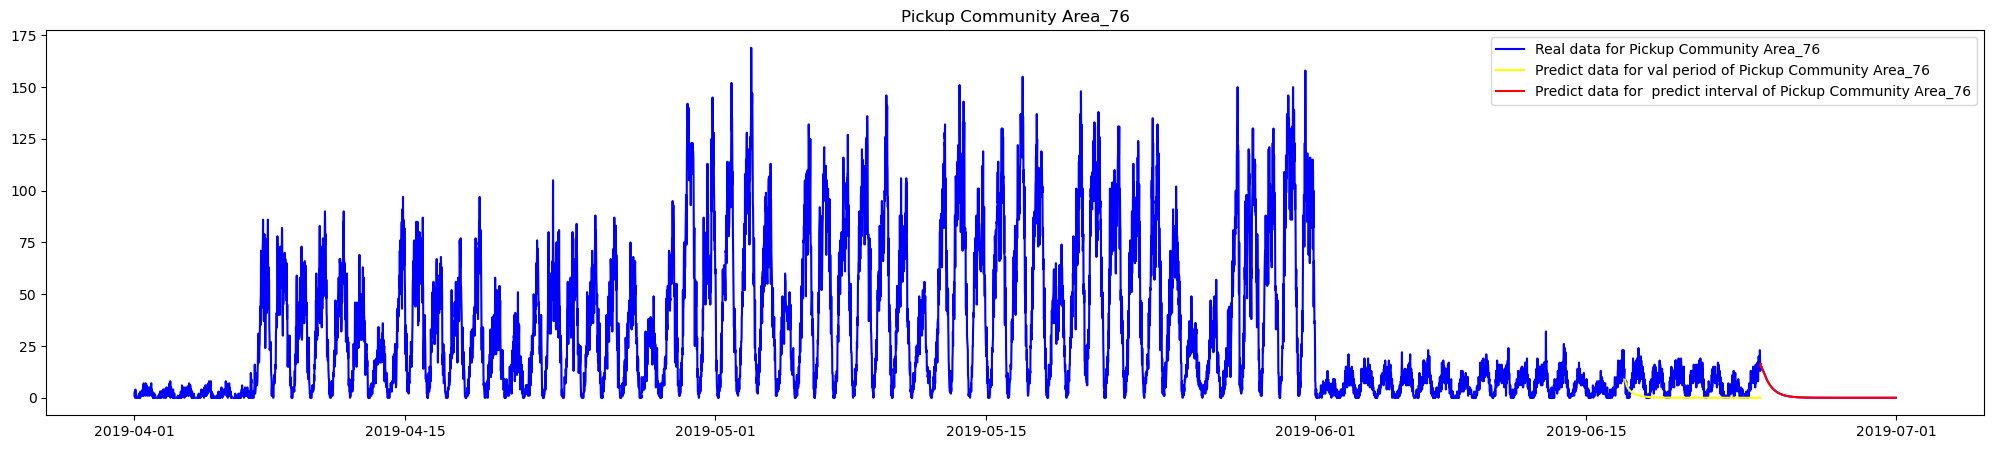

In [68]:
for area in df_total[df_total.columns[76:77]]:
	plt.figure(figsize=(25,5))
	plt.plot(df_total[area], label=f'Real data for {area}', color='blue')
	plt.plot(df_val_predict[area], label=f'Predict data for val period of {area}', color='yellow')
	plt.plot(df_sarimax_predict[area], label=f'Predict data for  predict interval of {area}', color='red')
	plt.legend(loc='best')
	plt.title(area)
	plt.show()

In [69]:
df_sarimax_predict['Pickup Community Area_76']

Trip Start Timestamp
2019-06-24 00:00:00    15.232288
2019-06-24 00:15:00    16.426800
2019-06-24 00:30:00    15.848776
2019-06-24 00:45:00    15.026132
2019-06-24 01:00:00    15.068988
                         ...    
2019-06-30 22:45:00     0.000003
2019-06-30 23:00:00     0.000003
2019-06-30 23:15:00     0.000003
2019-06-30 23:30:00     0.000003
2019-06-30 23:45:00     0.000003
Name: Pickup Community Area_76, Length: 672, dtype: float64

In [ ]:
tt = df_sarimax_predict.predicted_mean
tt.tail()

In [ ]:
df_val_predict.tail()

In [70]:
res_mae = mean_absolute_error(df_val, df_val_predict)
res_mae

0.91509287849124

In [ ]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller


def adfuller_test(series, signif=0.05):

	"""
	Perform Augmented Dickey-Fuller to test for Stationarity of the given series
	and print report. Null Hypothesis: Data has unit root and is non-stationary.

	series: time series in pd.Series format
	signif: significance level for P-value to reject Null Hypothesis
	"""
	x = adfuller(series, autolag='AIC')

	#using dictionary saves different data types (float, int, boolean)
	output = {'Test Statistic': x[0],
			  'P-value': x[1],
			  'Number of lags': x[2],
			  'Number of observations': x[3],
			  f'Reject (signif. level {signif})': x[1] < signif }

	for key, val in x[4].items():
		output[f'Critical value {key}'] = val

	return Series(output)


In [ ]:
res = df_train.apply(lambda x: adfuller_test(x, 0.05), axis=0)

In [ ]:
print(res['Pickup Community Area_76'])

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
%matplotlib inline

series = np.random.randn(100)
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
	print('Critial Values:')
	print(f'   {key}, {value}')

In [ ]:
import statsmodels.api as sm

for area in df_train:
	p = sm.tsa.stattools.adfuller(df_train[area])[1]
	print(f'{area}: Критерий Дики-Фуллера (p-value) = {p}')